In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

try:
    import cPickle as pickle
except ImportError:
    import pickle

%matplotlib inline

sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("Set1")

plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['axes.labelsize'] = 'large'

# Dataset 

## Información general
Emo-DB | Berlin 
--- | --- 
Idioma | Alemán
Muestras | 535
Emociones | anger boredom disgust anxiety/fear happiness sadness neutral
Nº de actores | 10 (5H 5M)
Naturaleza | Simulada
URLs | [Documentación](http://emodb.bilderbar.info/index-1024.html) 

**Archivos**

carcterística | valor
--- | --- 
codec | PCM S16 LE
channels | Mono
sample rate  | 16000 Hz
bit rate | 16 kbps



## Selección de muestras
Emociones de estudio
- anger 
- disgust 
- fear 
- happiness 
- sadness

Cargando el objeto del dataset

In [6]:
dataset = "berlin-01234"
dataset_path = "data/" + dataset + "/"
print("Loading data from " + dataset + " data set...")
ds = pickle.load(open(dataset_path + dataset + '_db.p', 'rb'))
number_samples = len(ds.targets)

Loading data from berlin-01234 data set...


**Número de muestras**

In [7]:
print("Number of samples: " + str(number_samples))

Number of samples: 375


**Distribución de duración** de los audios

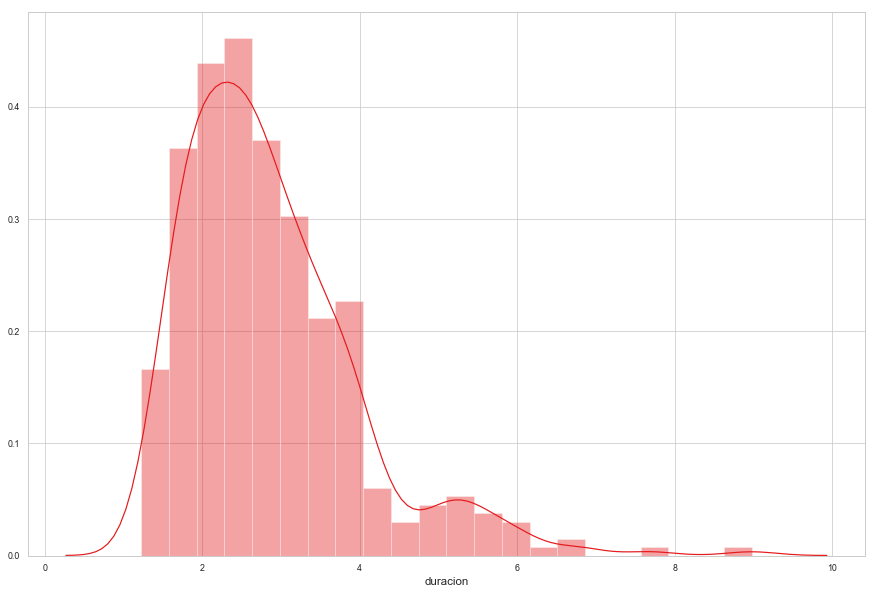

In [9]:
duracion = []
for i in range(0, number_samples):
    duracion.append((ds.data[i][0].size) / 16000)

df_duracion = pd.Series(data=duracion, name="duracion")
sns.distplot(df_duracion)

Numero de **muestras por emoción**:

In [10]:
df_emotions = pd.Series(data=ds.targets, name="emotion", dtype="category")
df_emotions = df_emotions.map(lambda i: ds.dictionary[i])
df_emotions.value_counts()

anger        127
happiness     71
fear          69
sadness       62
disgust       46
Name: emotion, dtype: int64

**Distribución de duración según la emoción**

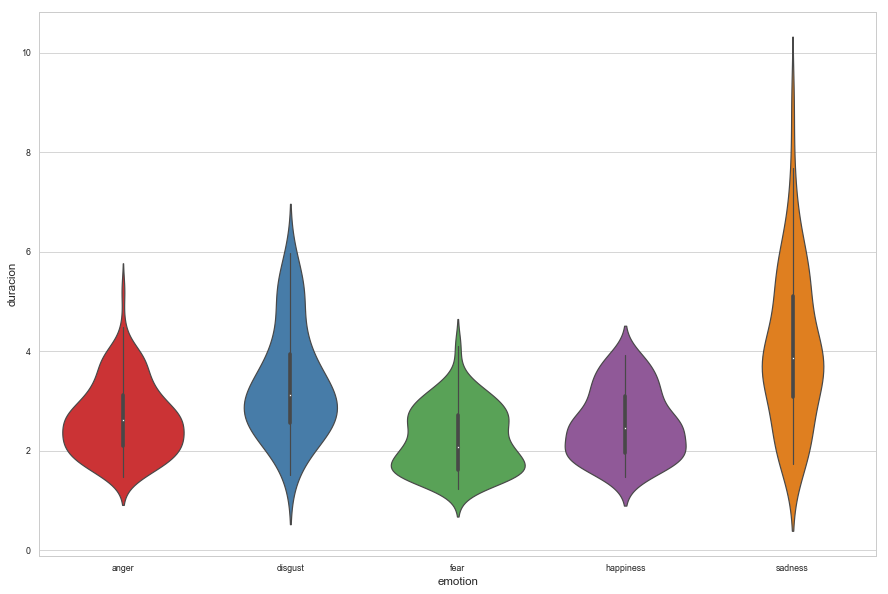

In [11]:
df_aux = pd.concat([df_emotions, df_duracion], axis=1)
sns.violinplot(x=df_aux["emotion"], y=df_aux["duracion"])

## Selección de la longitud de ventana de muestreo

In [12]:

df_compare_frame_size = pd.read_csv('data/compare_frame_size_csv/' + dataset +
                                    '.csv')
df_compare_frame_size.head()

,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,mfcc_2,...,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12,chroma_std,harmonic_ratio,pitch,frame_size,emotion
0,-0.014042,-0.031719,0.198890,-0.007114,-0.015172,0.088135,-0.031536,-0.002650,-2.716810,-0.249370,...,-0.031405,-0.032287,-0.032099,-0.031171,-0.032395,-0.030660,-0.021300,3.841374,0.015,anger
1,-0.016042,-0.032241,0.197576,-0.008433,-0.014398,0.062810,-0.031345,-0.007262,-2.759371,-0.208668,...,-0.032001,-0.032879,-0.032703,-0.031550,-0.032842,-0.030221,-0.019722,3.867798,0.015,disgust
2,-0.022509,-0.039243,0.185487,-0.015328,-0.022005,0.063281,-0.038539,-0.012655,-2.641903,-0.221285,...,-0.038977,-0.039880,-0.039758,-0.038305,-0.039881,-0.037481,-0.026981,3.975121,0.015,fear
3,-0.029806,-0.044883,0.163668,-0.023223,-0.029349,0.047722,-0.044031,-0.020924,-2.518517,-0.216713,...,-0.044487,-0.045346,-0.045196,-0.044130,-0.045339,-0.043232,-0.033301,4.057752,0.015,happiness
4,0.015938,0.003999,0.290909,0.026799,0.025939,0.076073,0.006242,0.022182,-3.413185,-0.175362,...,0.003554,0.002999,0.003078,0.005273,0.003000,0.008196,0.015699,3.267230,0.015,sadness


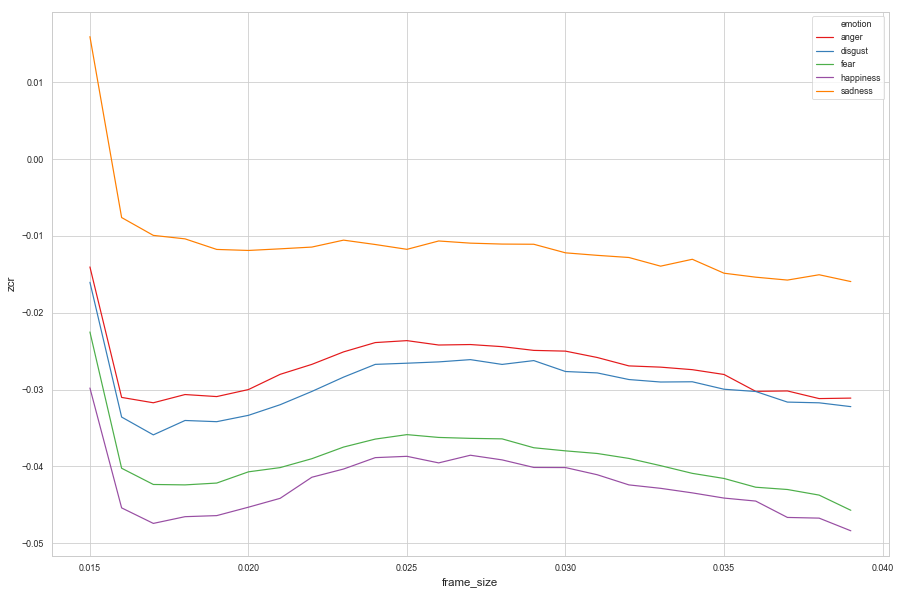

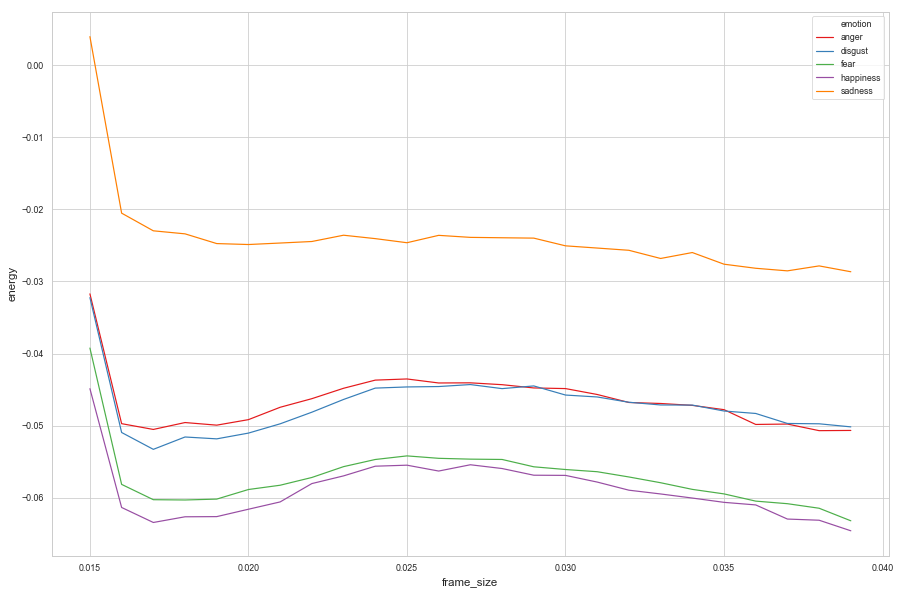

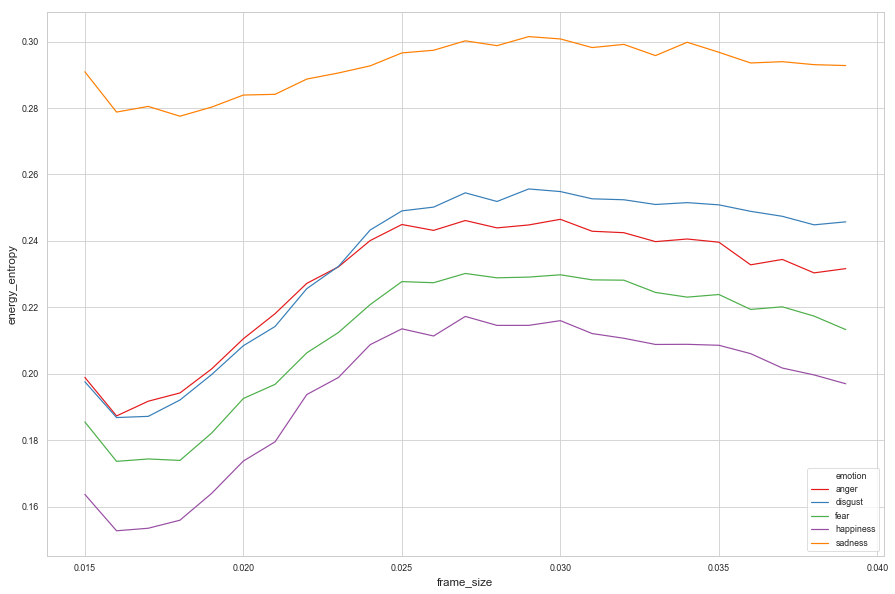

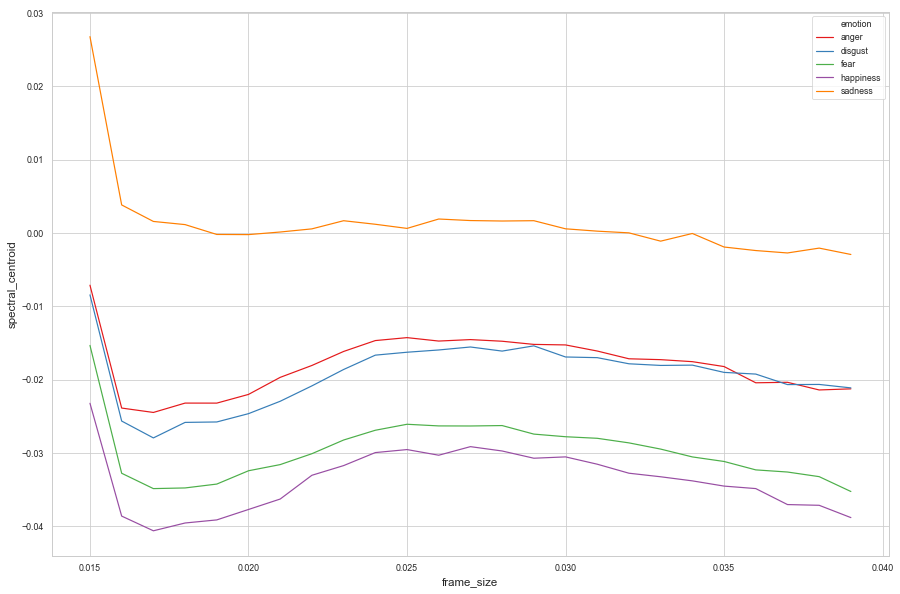

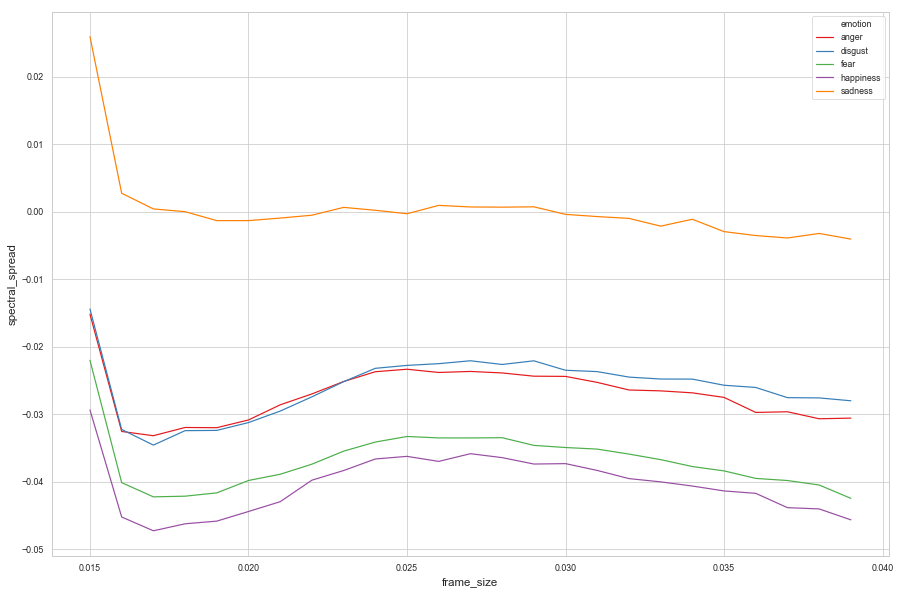

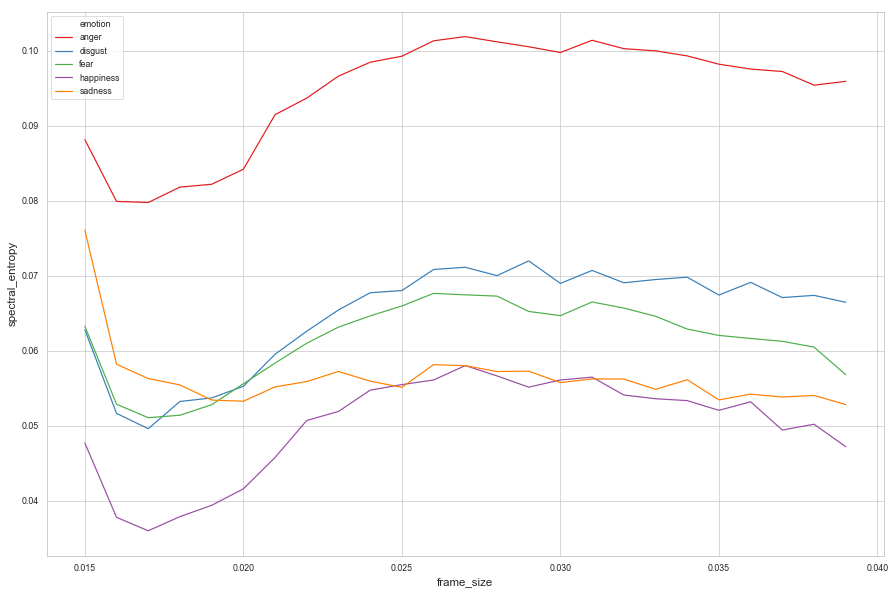

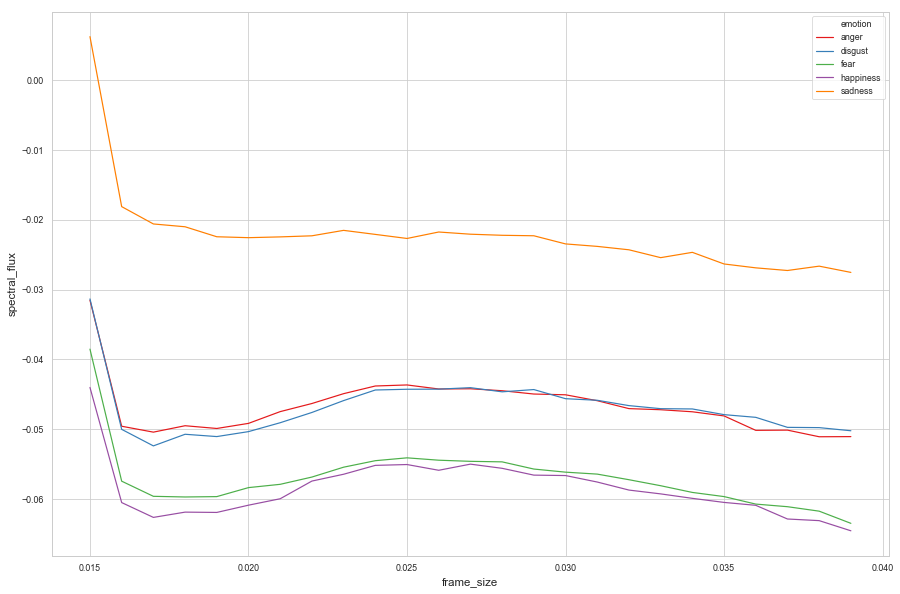

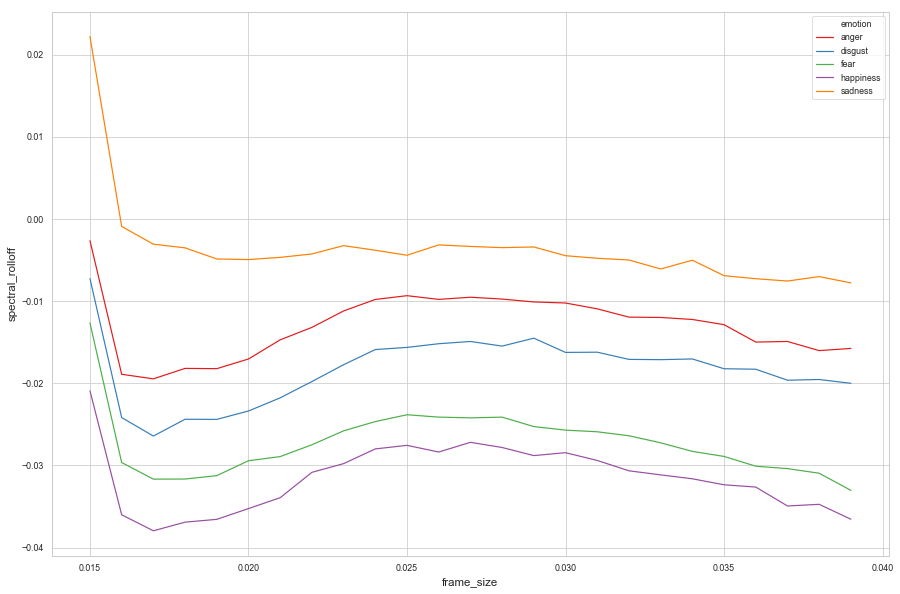

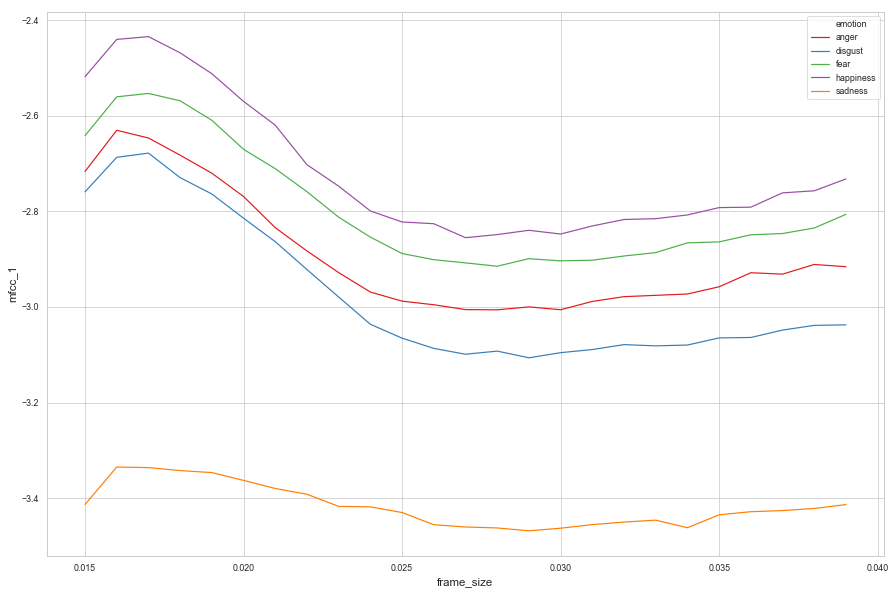

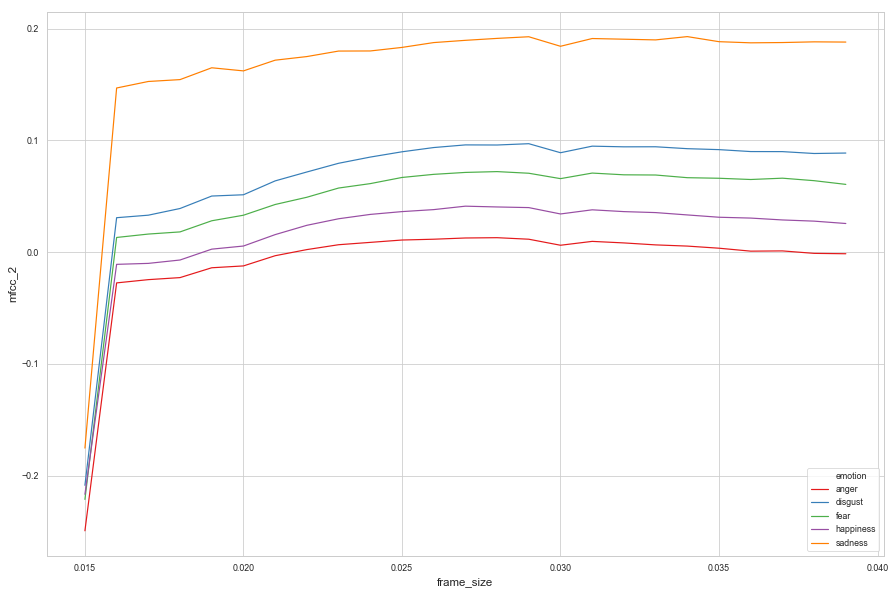

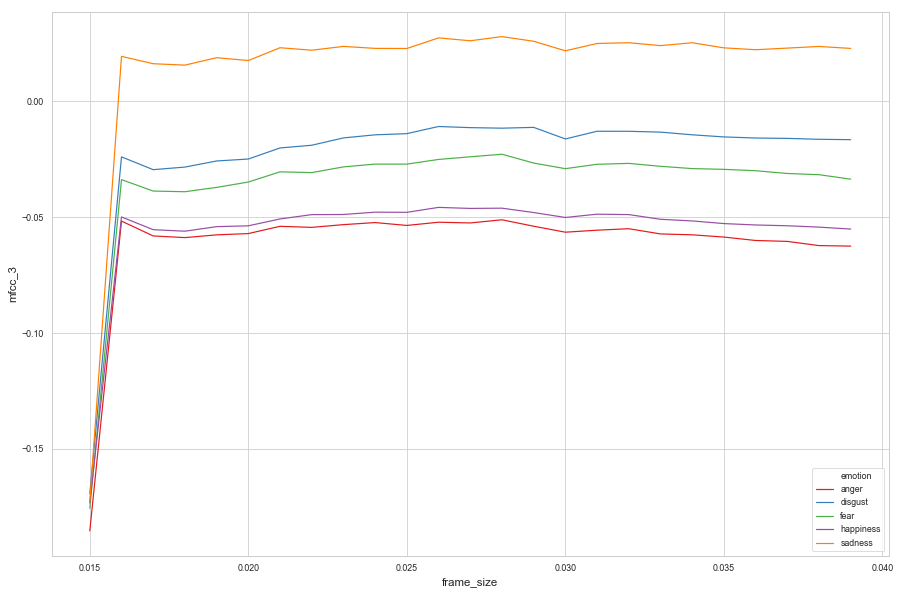

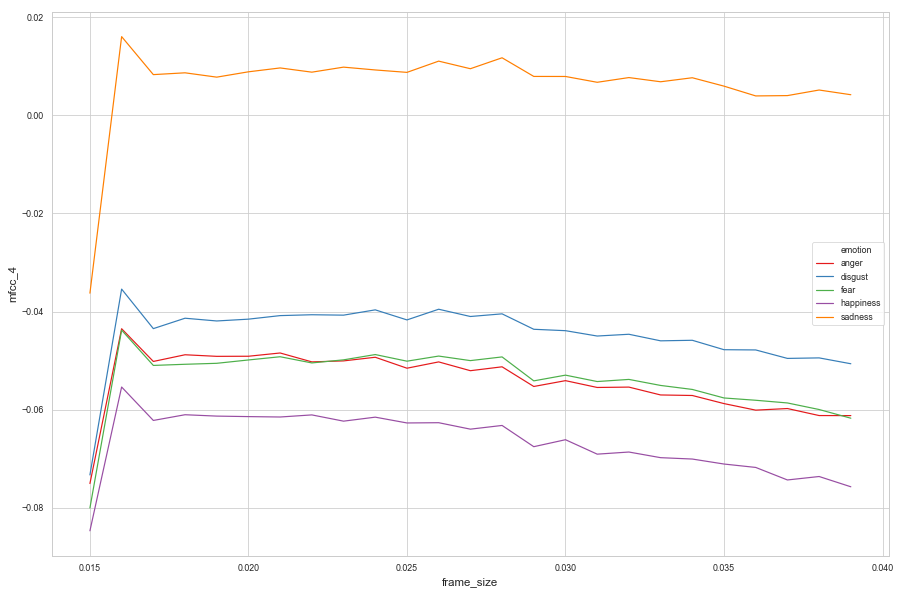

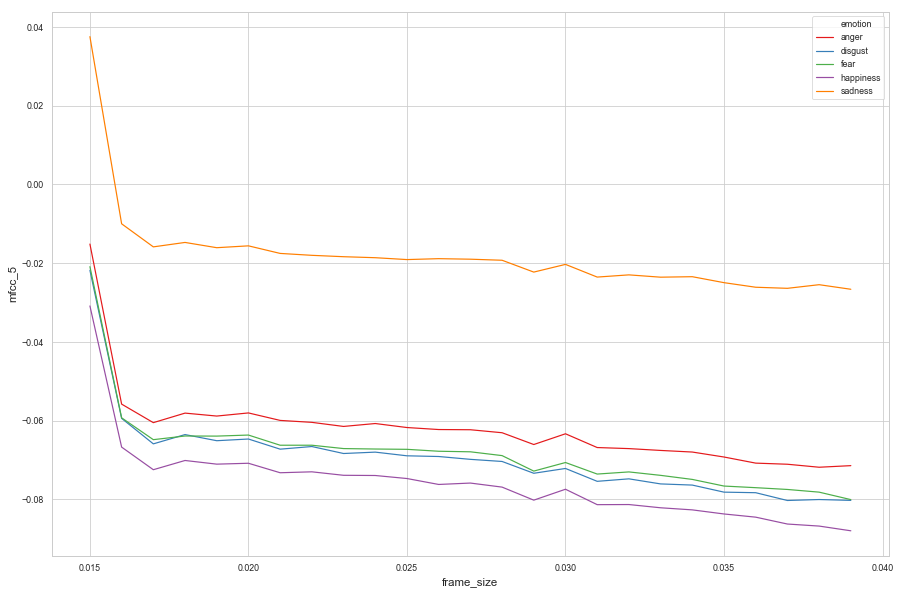

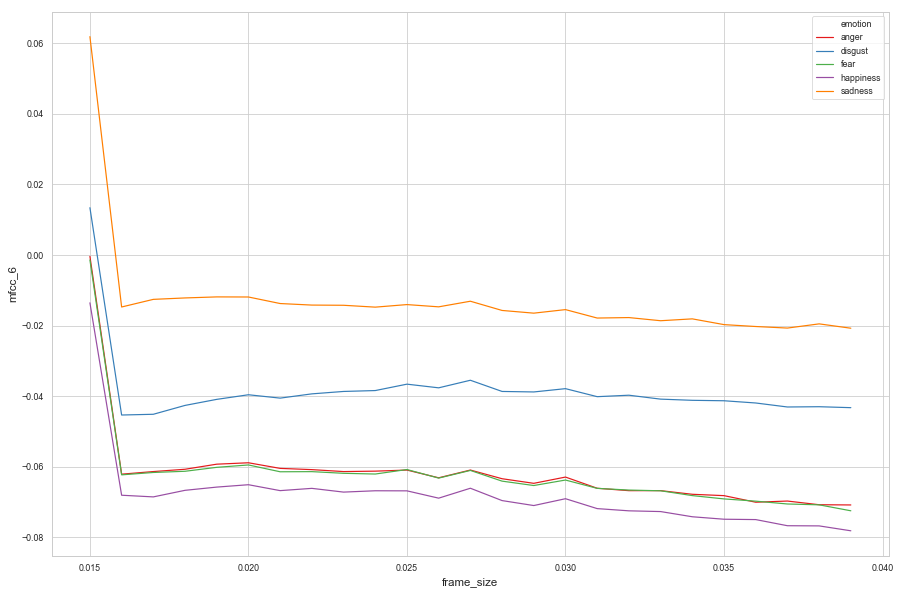

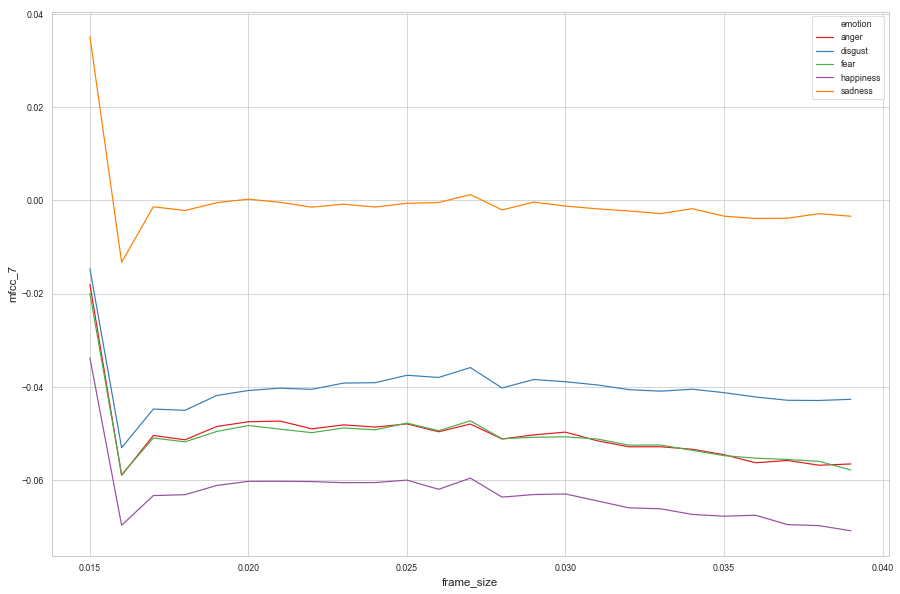

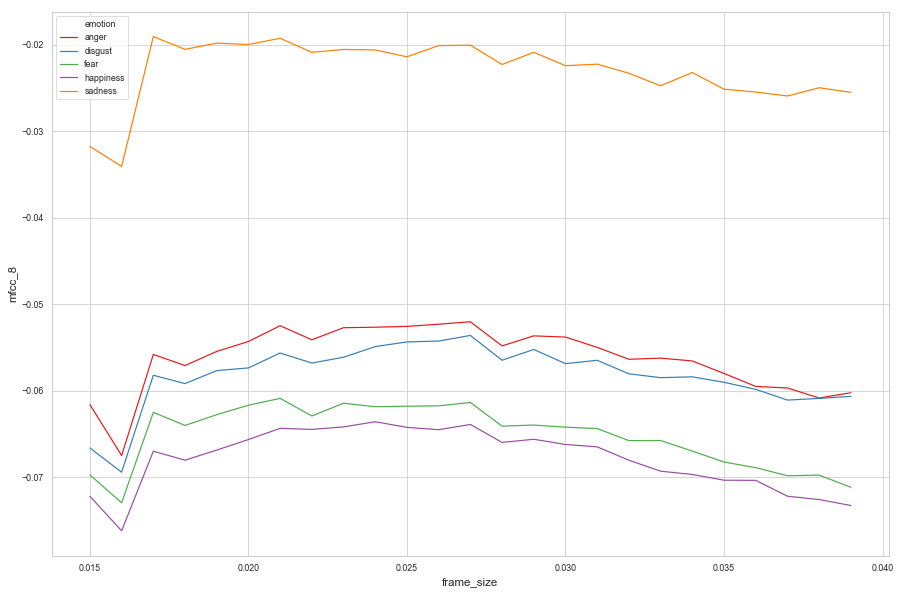

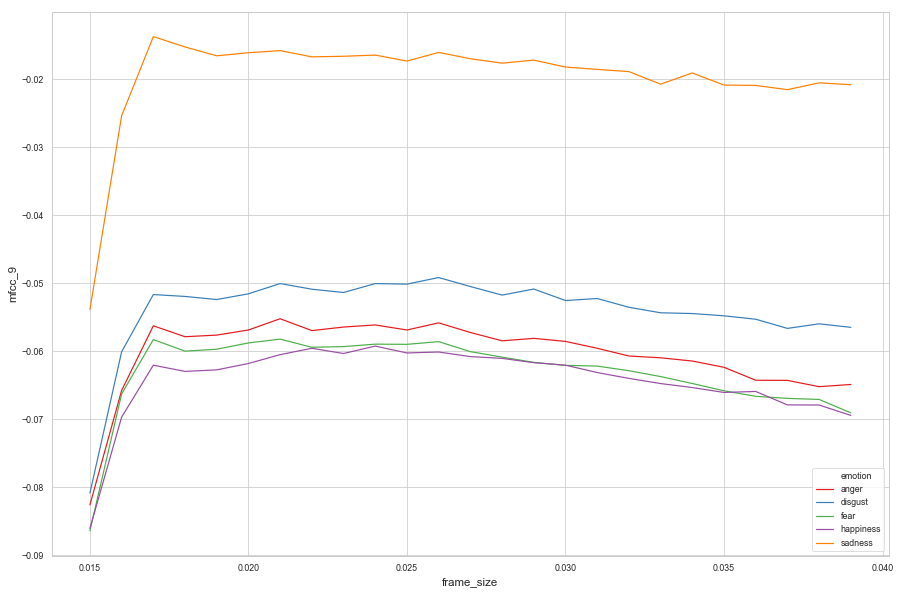

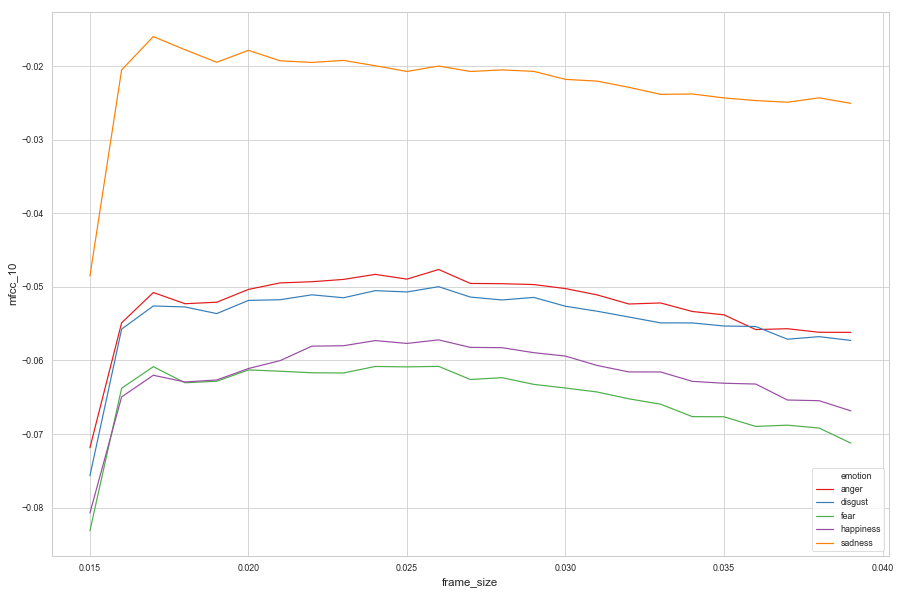

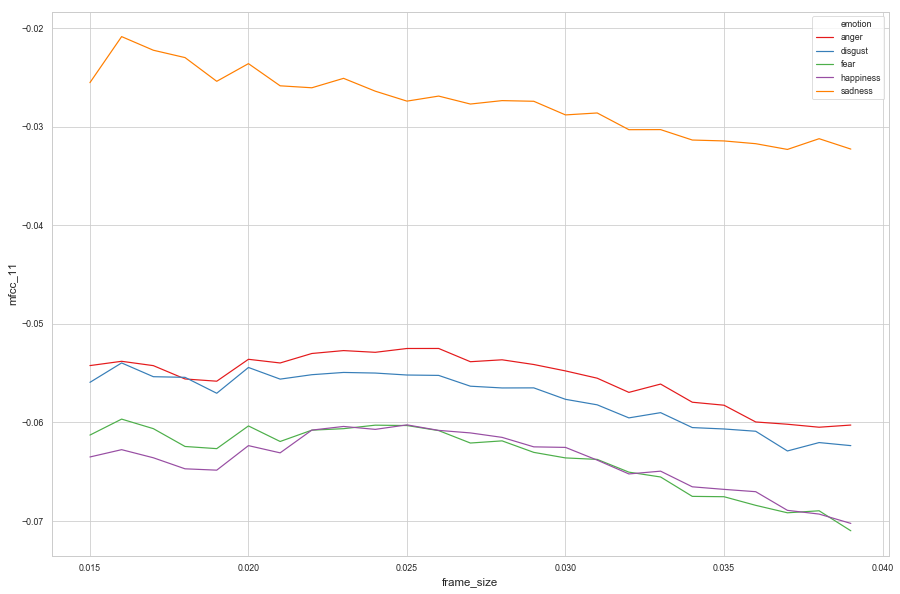

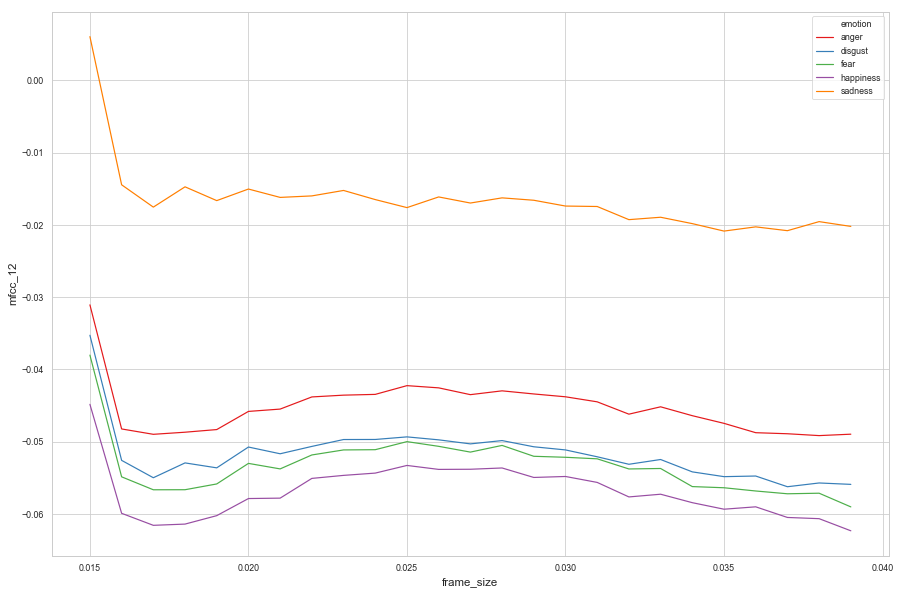

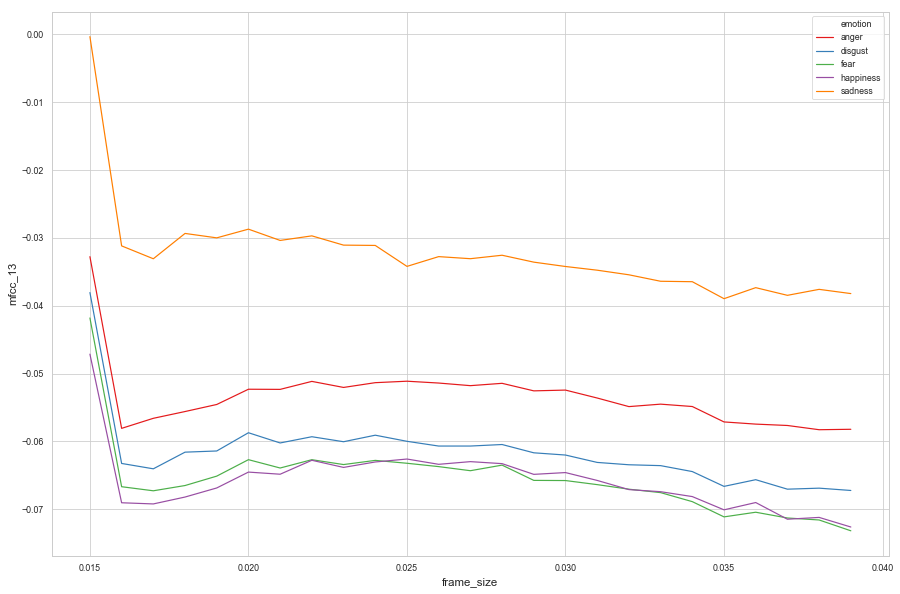

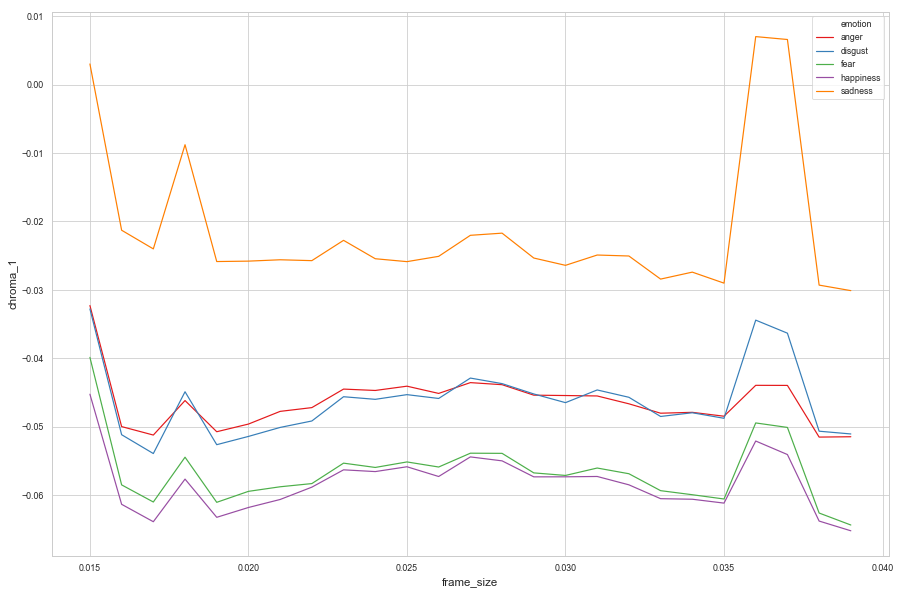

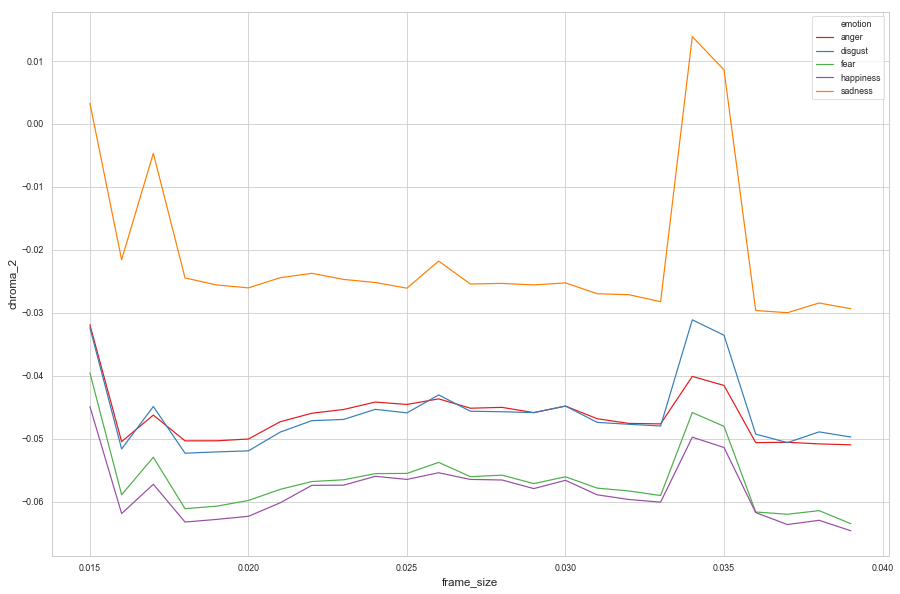

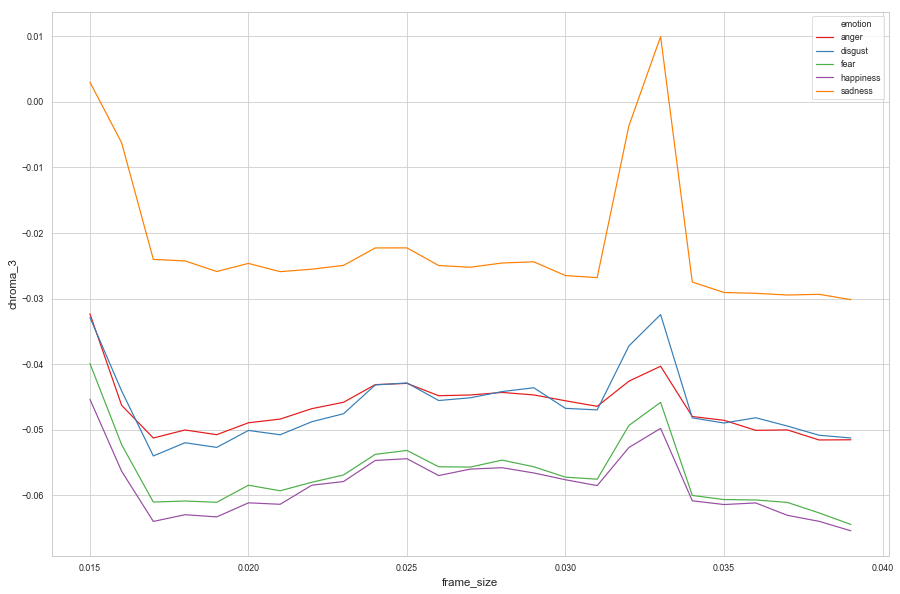

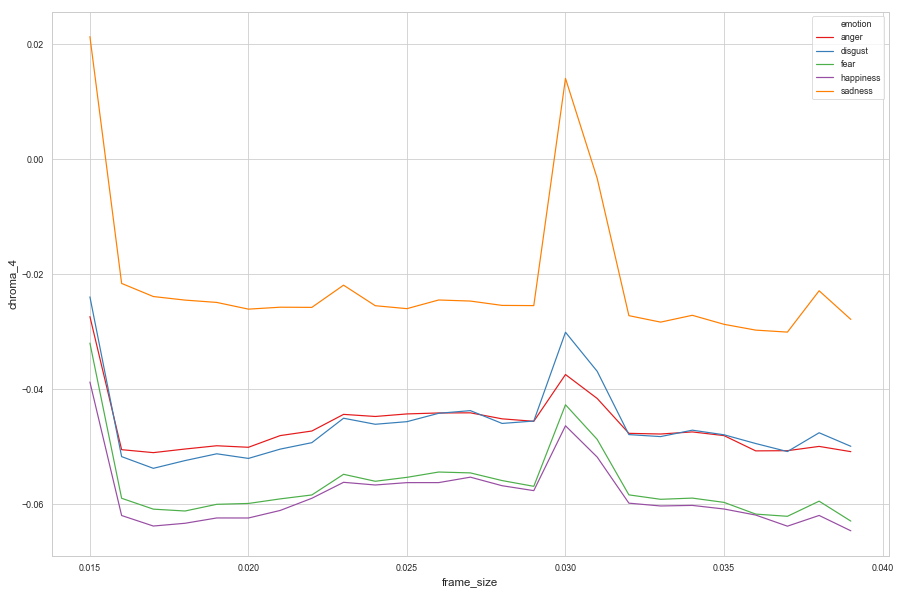

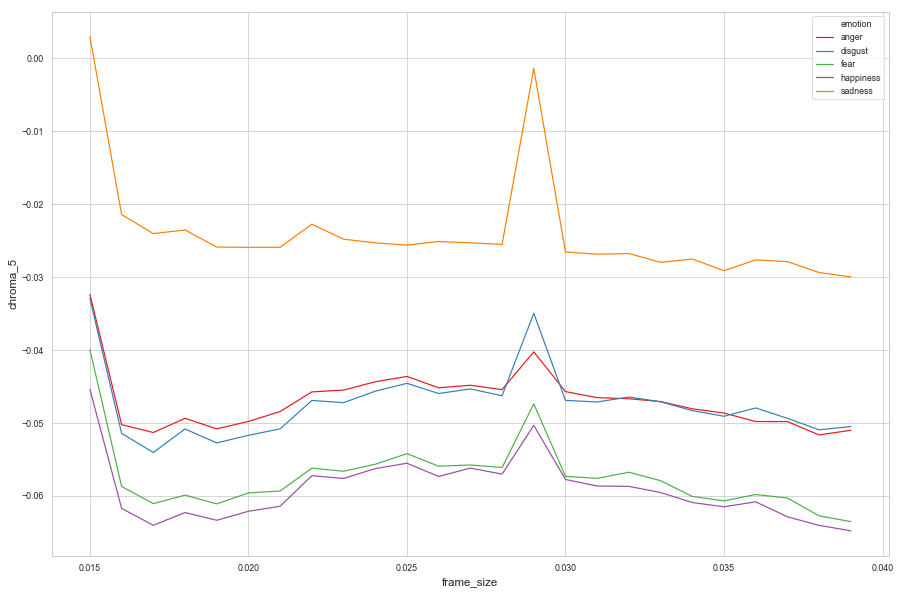

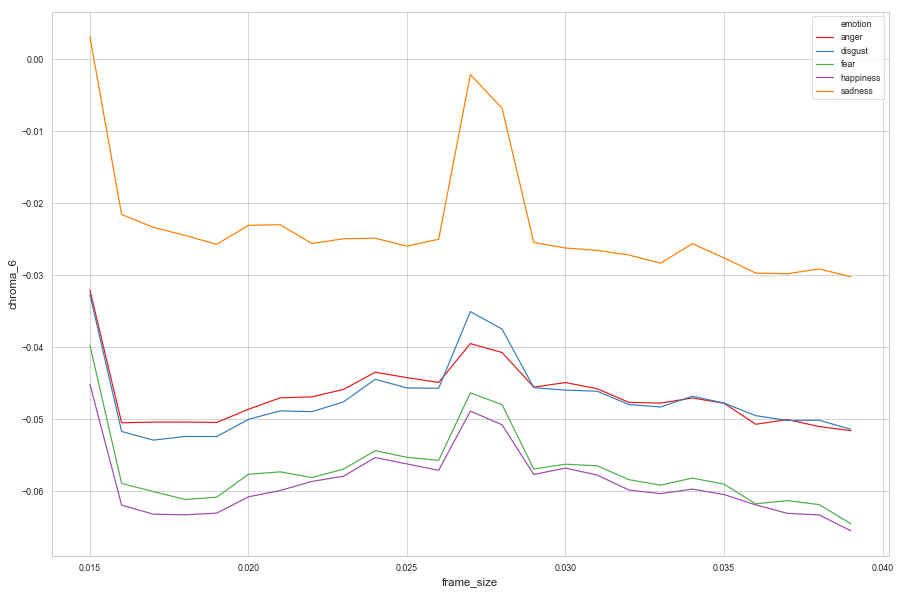

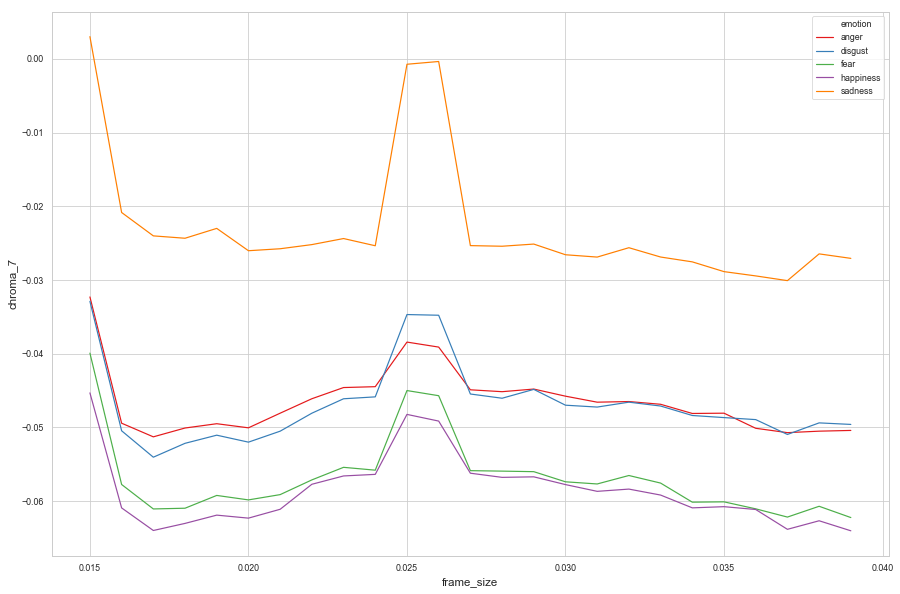

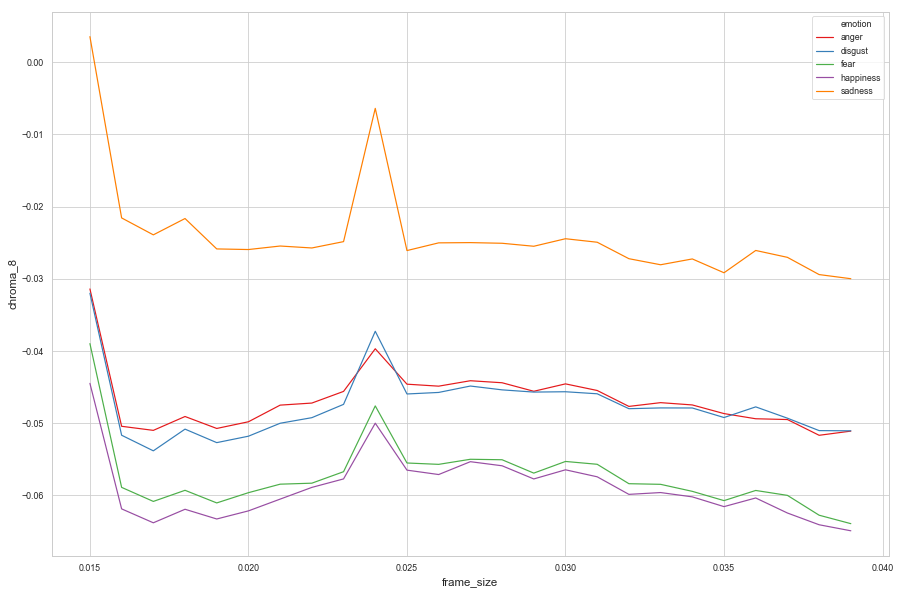

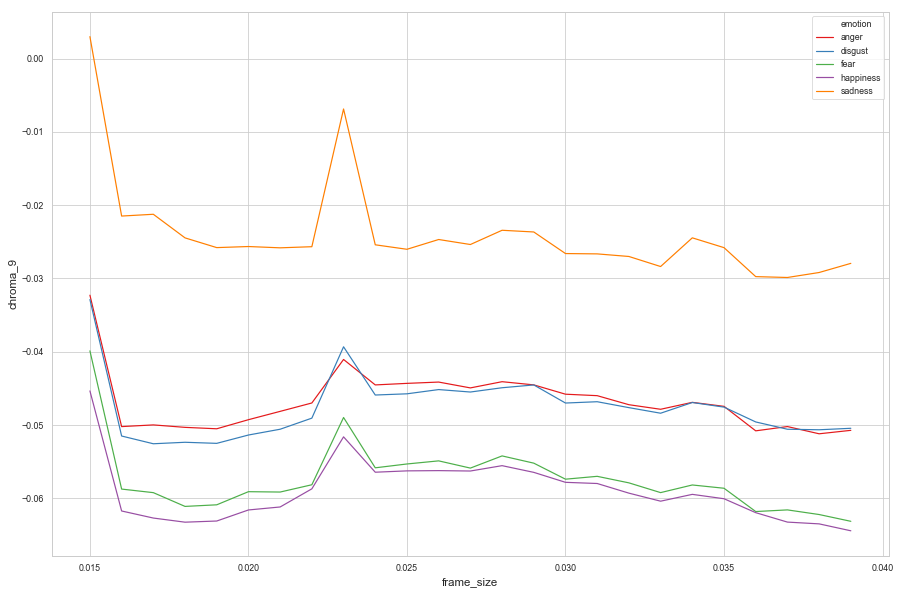

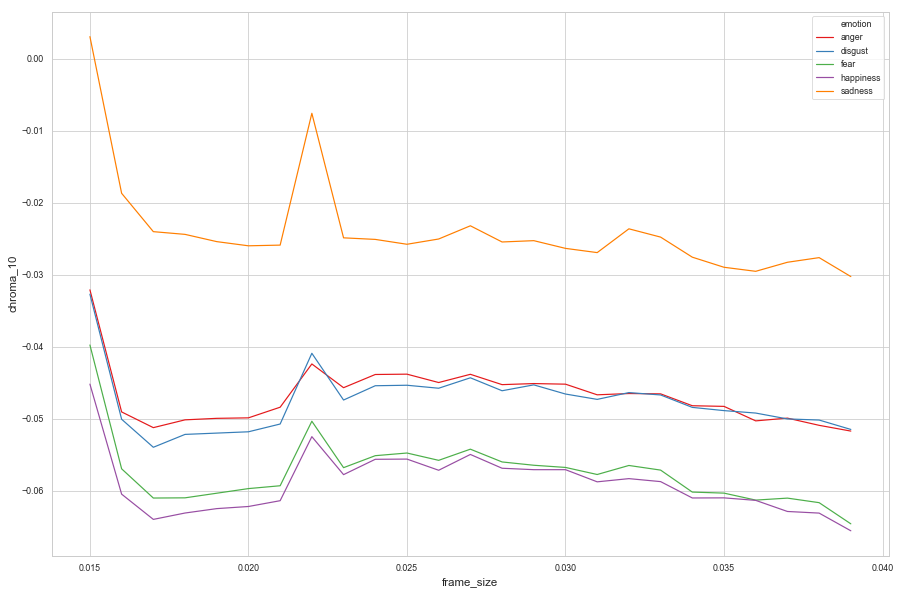

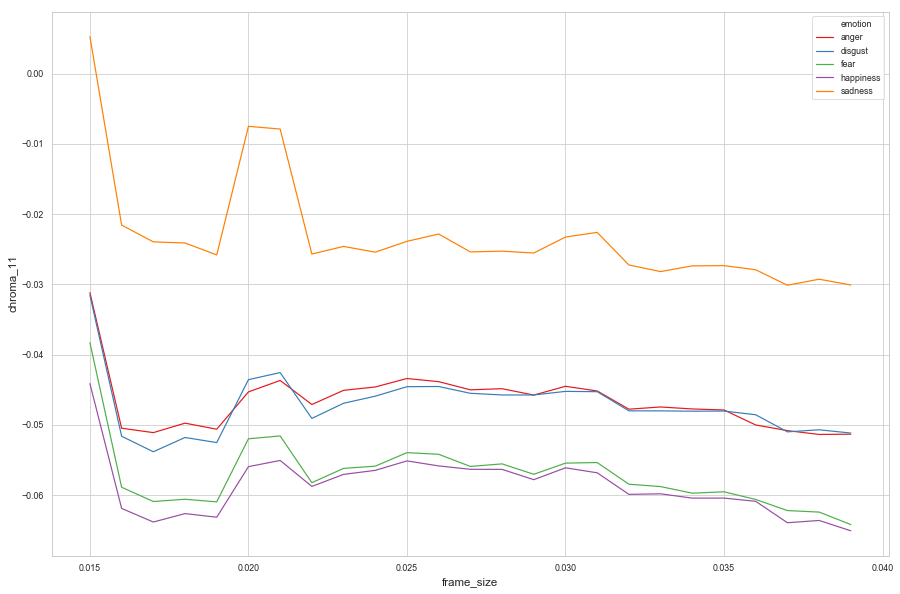

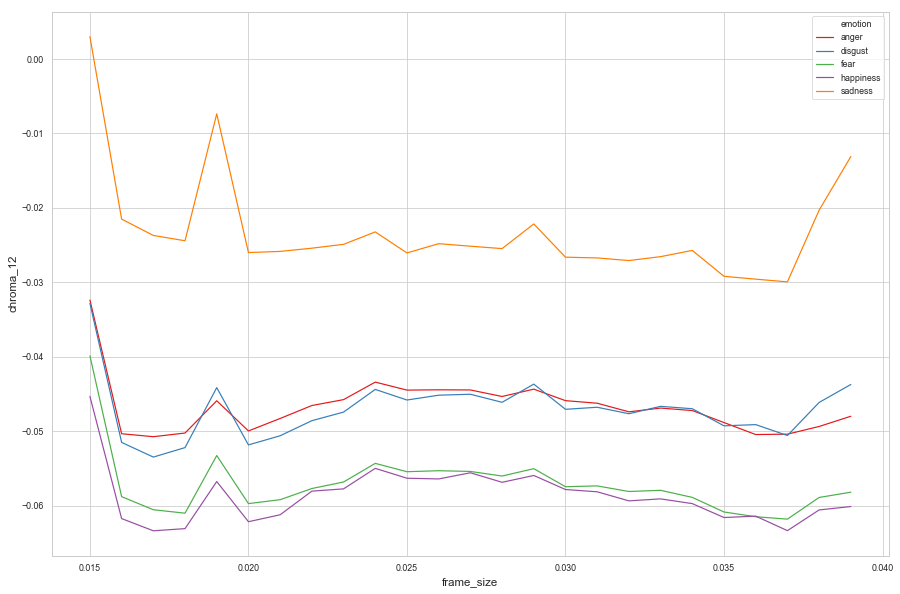

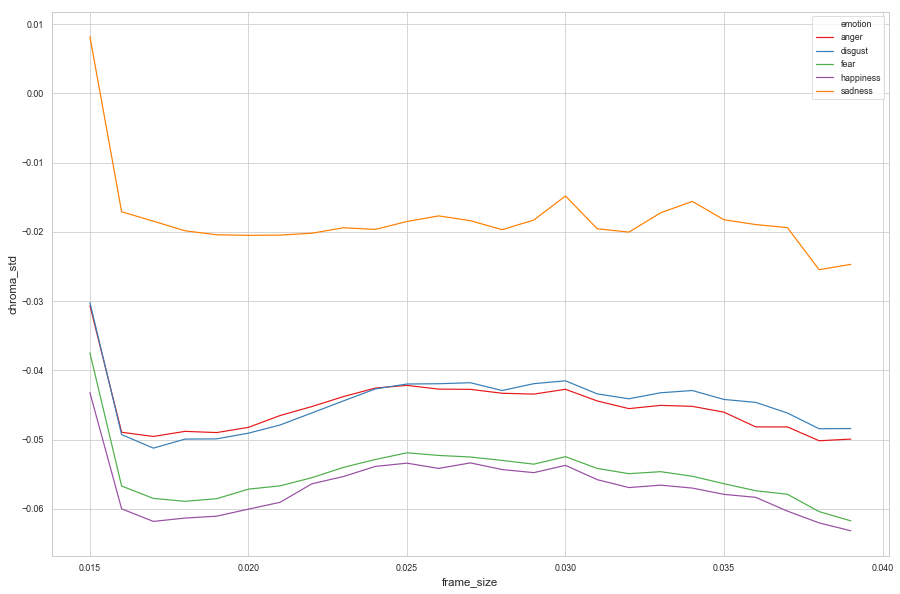

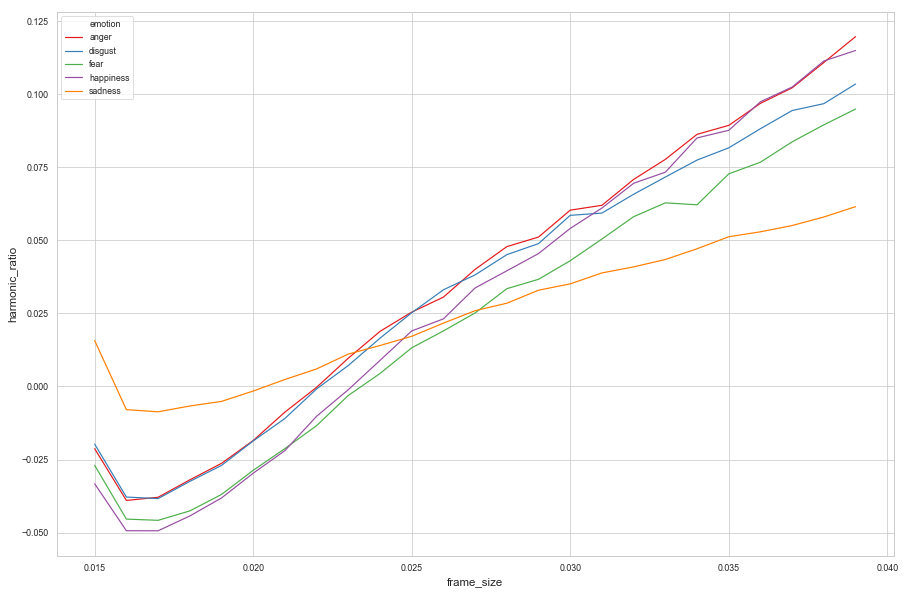

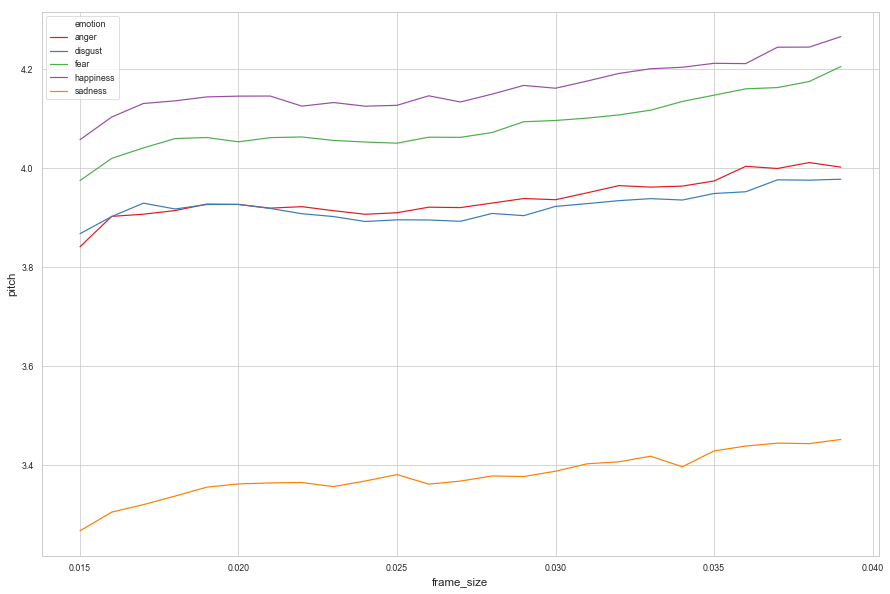

In [13]:
for column in df_compare_frame_size.drop(["frame_size","emotion"],axis=1):
    ax = sns.lineplot(x="frame_size", y=column, hue="emotion", data=df_compare_frame_size)
    plt.show()
    

# Características

Cargando el array tridimensional de características

In [14]:
label_features = [
    'zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread',
    'spectral_entropy', 'spectral_flux', 'spectral_rolloff', 'mfcc_1',
    'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8',
    'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'chroma_1',
    'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7',
    'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'chroma_12',
    'chroma_std', 'harmonic_ratio', 'pitch'
]


print("Loading features from file...\n")
features = pickle.load(open(dataset_path + dataset + '_features.p', 'rb'))

Loading features from file...



Creando un **dataframe con MultiIndex** a partir del objeto tridimensional

In [15]:
df = pd.DataFrame()
audio_index = []
row_index = []
i = 0
for single_audio in features:
    audio_index = np.full(shape=len(single_audio), fill_value=i)
    row_index = np.arange(len(single_audio))
    index_df = pd.DataFrame({"audio_number": audio_index, "row": row_index})

    single_audio_df = pd.DataFrame(single_audio, columns=label_features)

    aux_df = pd.concat([index_df, single_audio_df], axis=1)

    df = pd.concat([df, aux_df], axis=0, ignore_index=True)
    i += 1

df = df.set_index(["audio_number", "row"])
df.head()

zcr    energy  energy_entropy  spectral_centroid  \
audio_number row                                                          
0            0    0.167016  0.163809        0.588712           0.183178   
             1    0.161524  0.161528        0.625422           0.173026   
             2    0.165041  0.165044        0.632432           0.178600   
             3    0.161103  0.161106        0.629467           0.177717   
             4    0.163598  0.163599        0.567823           0.187367   

                  spectral_spread  spectral_entropy  spectral_flux  \
audio_number row                                                     
0            0           0.197655          0.172822       0.163805   
             1           0.189156          0.162667       0.178283   
             2           0.194892          0.166704       0.165347   
             3           0.193578          0.164746       0.164885   
             4           0.201061          0.179735       0.171544   

                  spectral_rolloff    mfcc_1    mfcc_2  ...  chroma_6  \
audio_number row                                        ...             
0            0            0.165084 -5.894501  0.089792  ...  0.163835   
             1            0.161524 -5.894372  0.133167  ...  0.161525   
             2            0.165041 -5.893870  0.086794  ...  0.165043   
             3            0.161103 -5.892475  0.118552  ...  0.161111   
             4            0.164849 -5.896268  0.092180  ...  0.163660   

                  chroma_7  chroma_8  chroma_9  chroma_10  chroma_11  \
audio_number row                                                       
0            0    0.163810  0.163977  0.163817   0.163833   0.164339   
             1    0.161525  0.161533  0.161524   0.161526   0.161532   
             2    0.165042  0.165062  0.165042   0.165043   0.165044   
             3    0.161109  0.161154  0.161105   0.161109   0.161168   
             4    0.163621  0.163754  0.163610   0.163650   0.164212   

                  chroma_12  chroma_std  harmonic_ratio     pitch  
audio_number row                                                   
0            0     0.163810    0.176986        0.163879  0.163805  
             1     0.161524    0.174602        0.161524  0.161524  
             2     0.165042    0.178048        0.165041  0.165041  
             3     0.161104    0.174461        0.161103  0.161103  
             4     0.163605    0.176498        0.163598  0.163598  

[5 rows x 36 columns]

Función para la representación de los boxplot de cada caraterística

In [16]:
def display_boxplot(feature, df, df_emotions):
    df_features_mean = pd.DataFrame(columns=label_features)
    for i in range(0, df_emotions.size):
        df_features_mean = df_features_mean.append(df.loc[i].mean(),
                                                   ignore_index=True)
    df_aux = pd.concat([df_emotions, df_features_mean], axis=1)

    sns.boxplot(x=df_aux["emotion"], y=df_aux[feature])
    plt.xlabel("emotion", fontsize=20)
    plt.ylabel(feature, fontsize=20)
    plt.tick_params(labelsize=17)
    plt.show()

## Zero Crossing Rate (zcr)

ZCR calcula el **promedio ponderado de la cantidad de veces que la señal de voz cambia de signo** dentro de una ventana de tiempo particular.


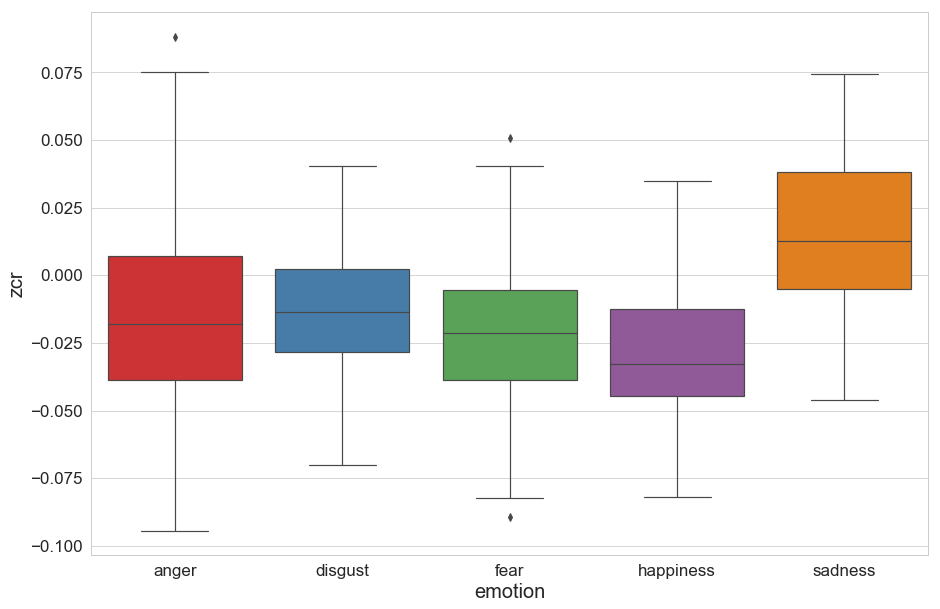

In [17]:
display_boxplot("zcr", df, df_emotions)

## Energy (energy)

Log-energy indica la amplitud cuadrada total en un segmento del habla. 
Esta característica es simplemente la **cantidad de potencia o volumen normalizado en la señal.**

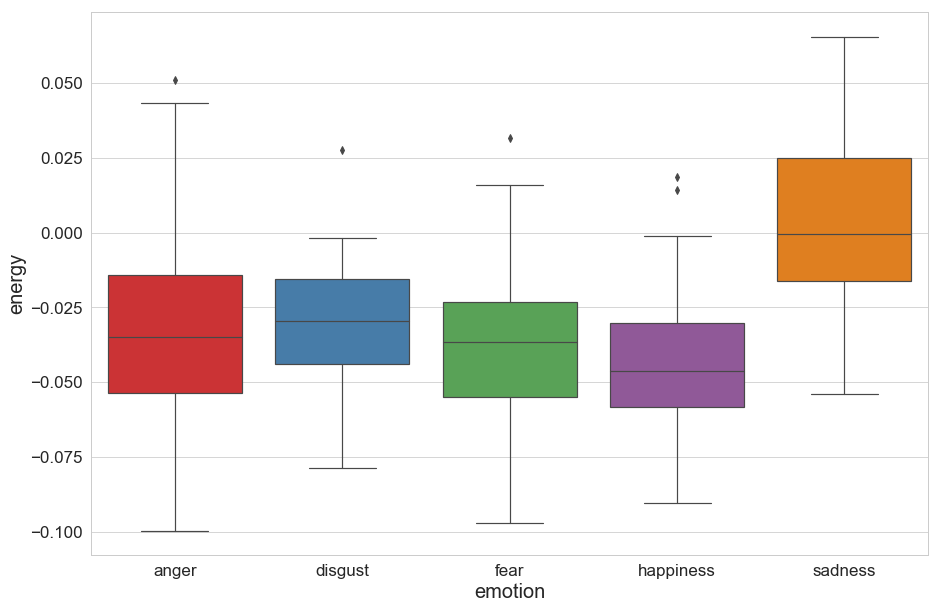

In [18]:
display_boxplot("energy", df, df_emotions)

## Entropy of Energy (energy_entropy)

La entropía de las energías normalizadas de los sub-frames. Puede interpretarse como una medida de cambios abruptos.

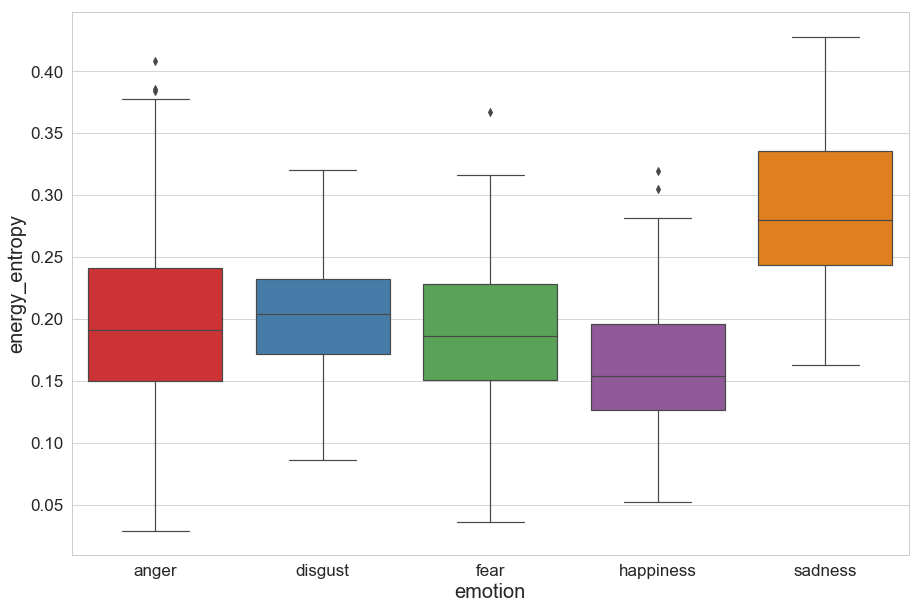

In [19]:
display_boxplot("energy_entropy", df, df_emotions)

## Pitch (pitch)

El tono puede cuantificarse como una frecuencia, pero el tono no es una propiedad física puramente objetiva; es un atributo psicoacústico subjetivo del sonido.

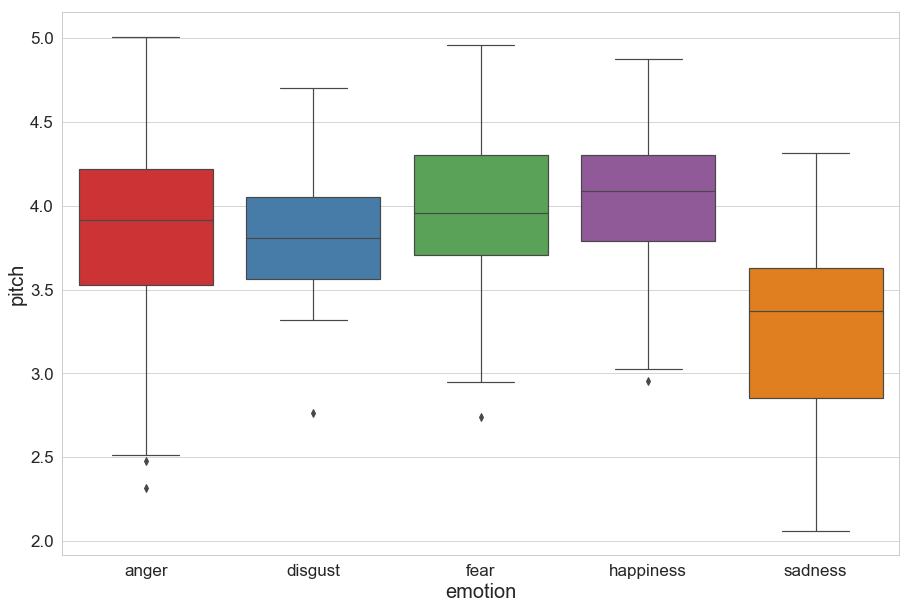

In [20]:
display_boxplot("pitch", df, df_emotions)

## Harmonic ratio (harmonic_ratio)

El ratio entre la energía en la porción armónica del frame respecto a la total.

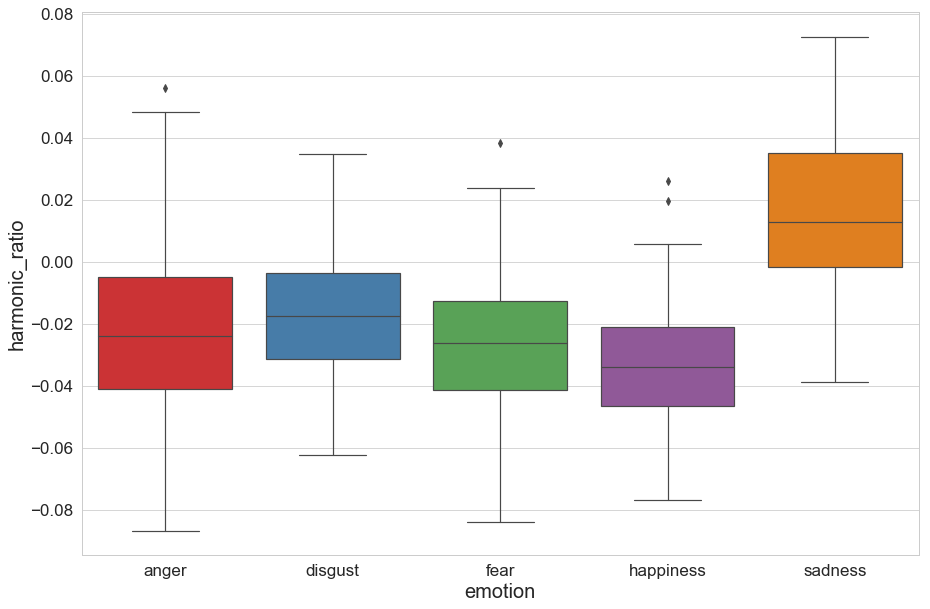

In [21]:
display_boxplot("harmonic_ratio", df, df_emotions)

# Spectral

## Spectral Centroid (spectral_centroid)

El centro de gravedad del espectro.

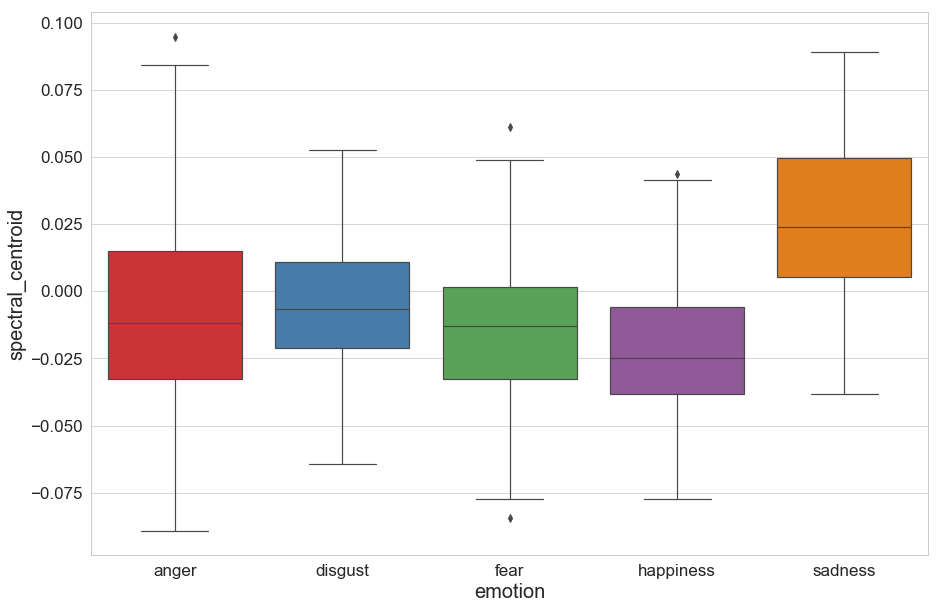

In [22]:
display_boxplot("spectral_centroid", df, df_emotions)

## Spectral Spread (spectral_spread)

The second central moment of the spectrum.

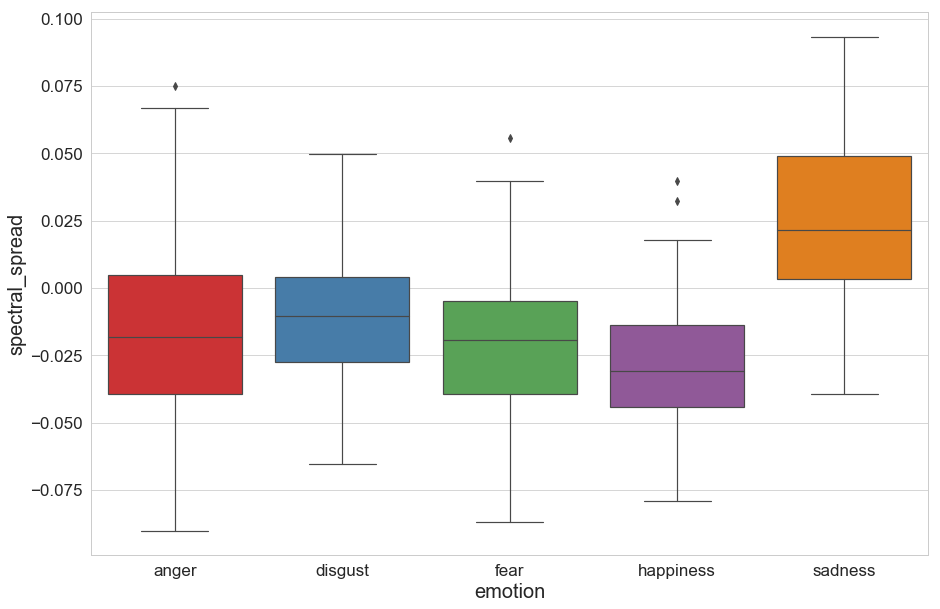

In [23]:
display_boxplot("spectral_spread", df, df_emotions)

## Spectral Entropy (spectral_entropy)

Entropía de las energías espectrales normalizadas para un conjunto de subframes.

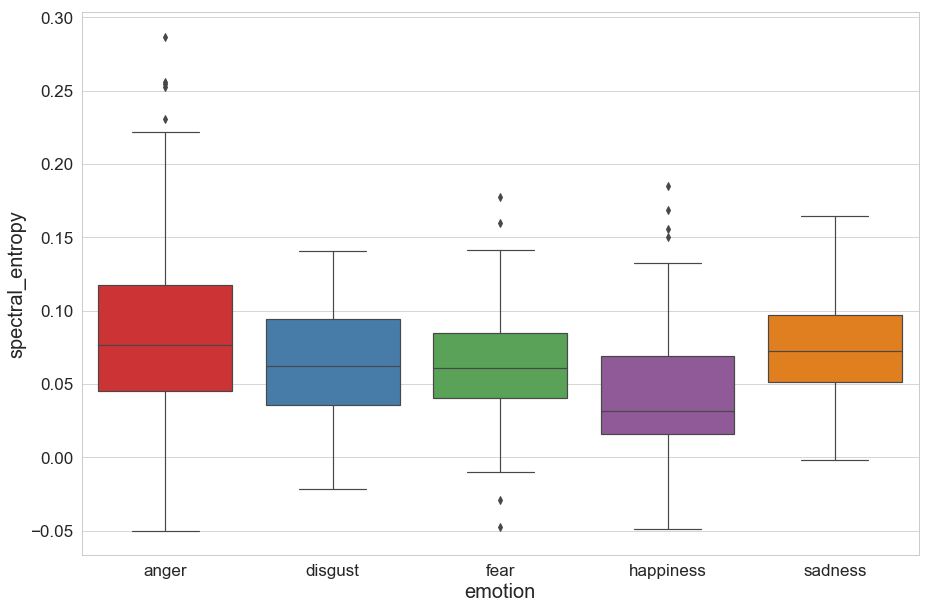

In [24]:
display_boxplot("spectral_entropy", df, df_emotions)

## Spectral Flux (spectral_flux)

La diferencia al cuadrado entre las magnitudes normalizadas de los espectros de los dos frames sucesivos.

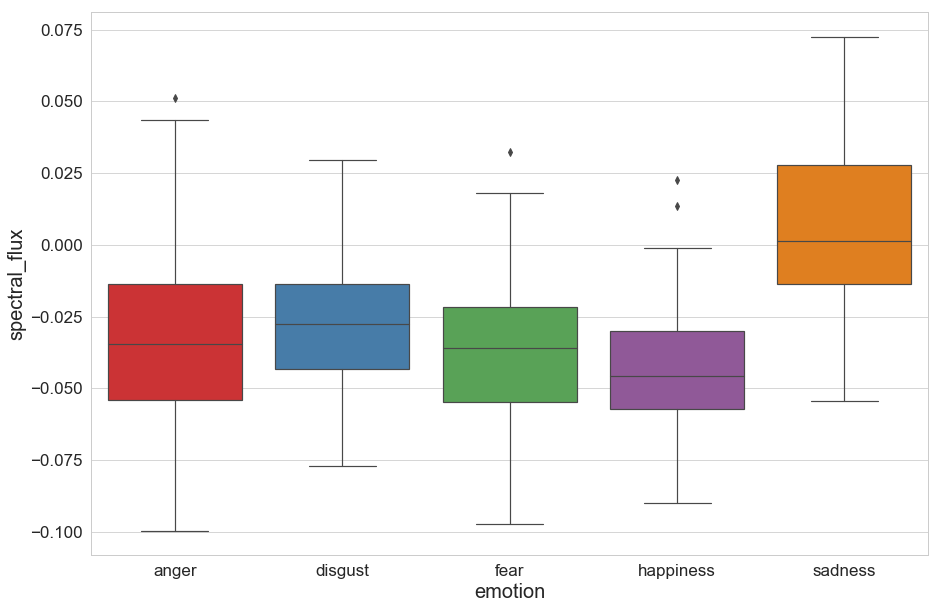

In [25]:
display_boxplot("spectral_flux", df, df_emotions)

## Spectral Rolloff (spectral_rolloff)

La frecuencia por debajo de la cual se concentra el 90% de la distribución de la magnitud del espectro.

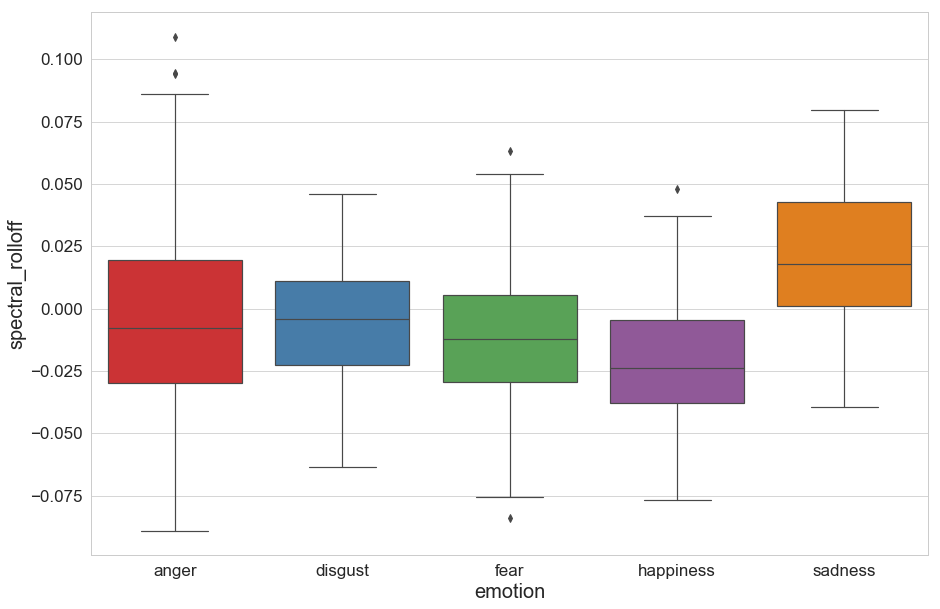

In [26]:
display_boxplot("spectral_rolloff", df, df_emotions)

## MFCCs  (mfcc_< X >)

Los Mel Frequency Cepstral Coeﬃcients (Coeﬁcientes Cepstrales en las Frecuencias de Mel) o MFCCs **son coeﬁcientes para la representación del habla basados en la percepción auditiva humana**.

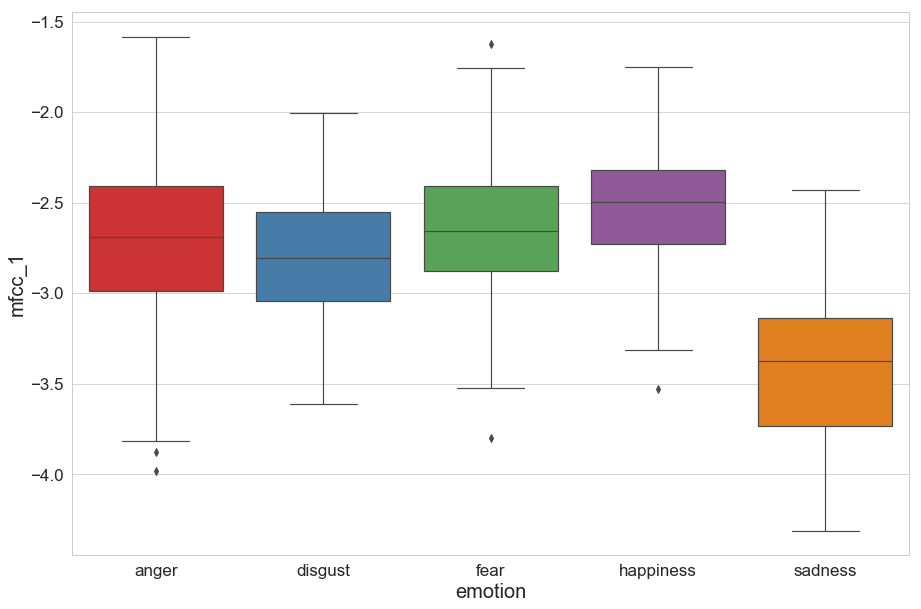

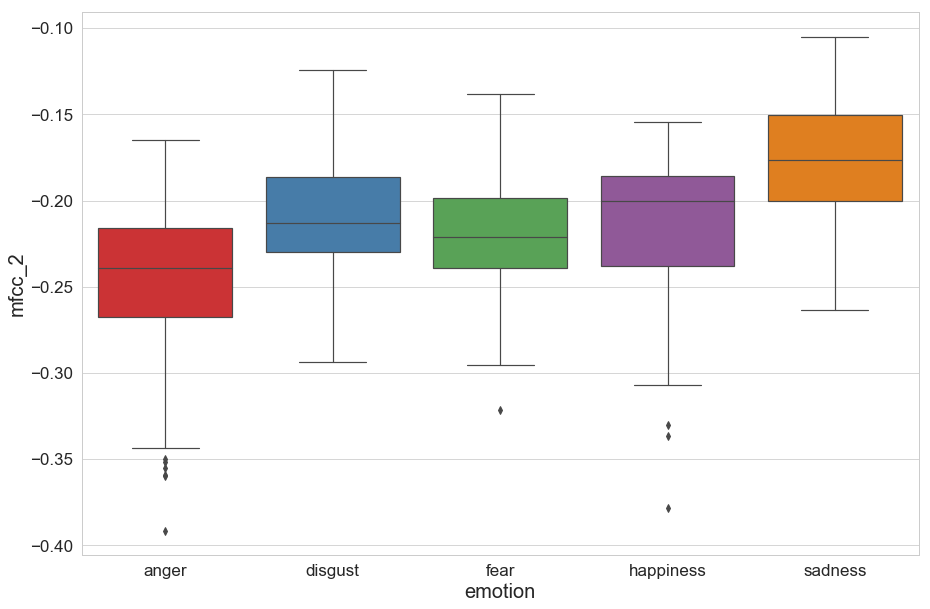

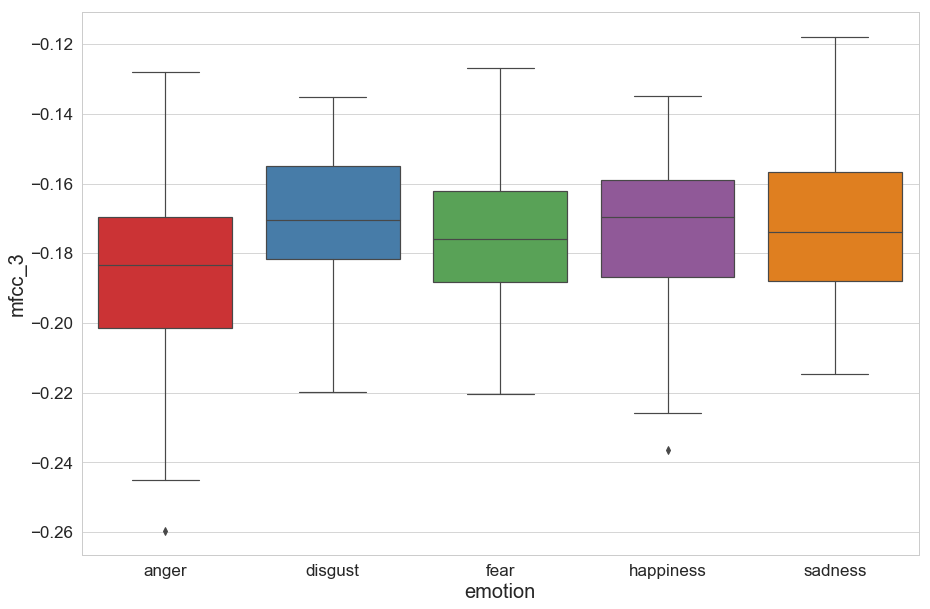

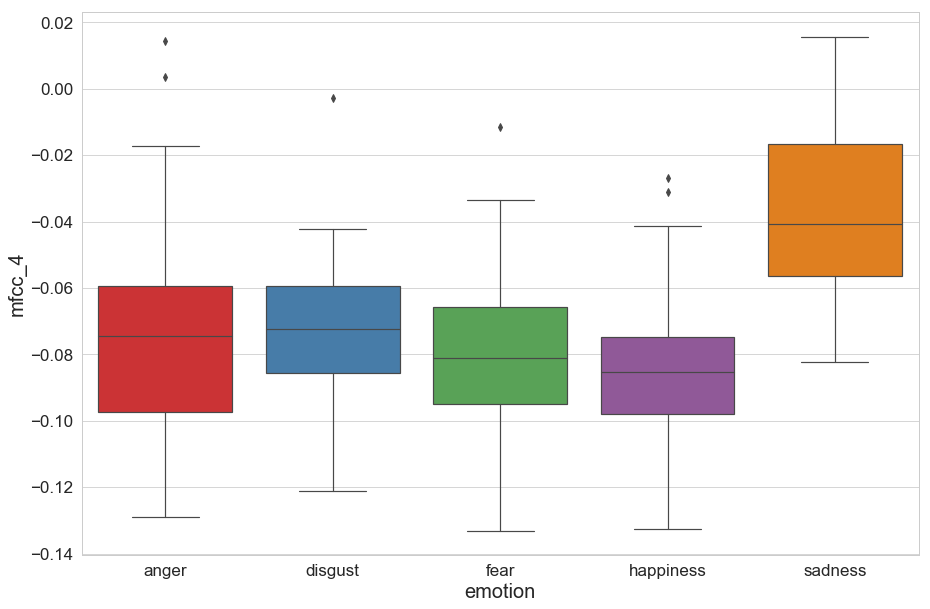

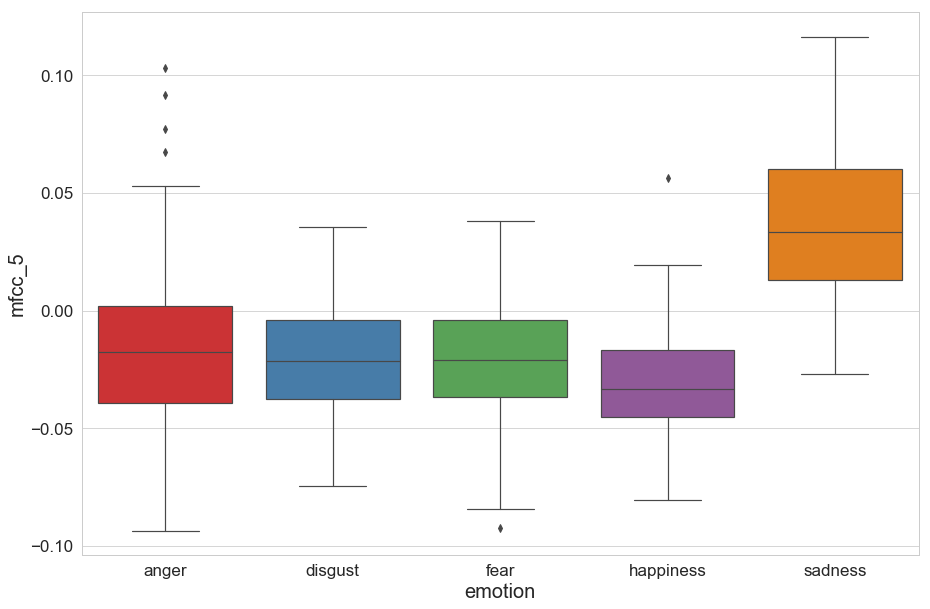

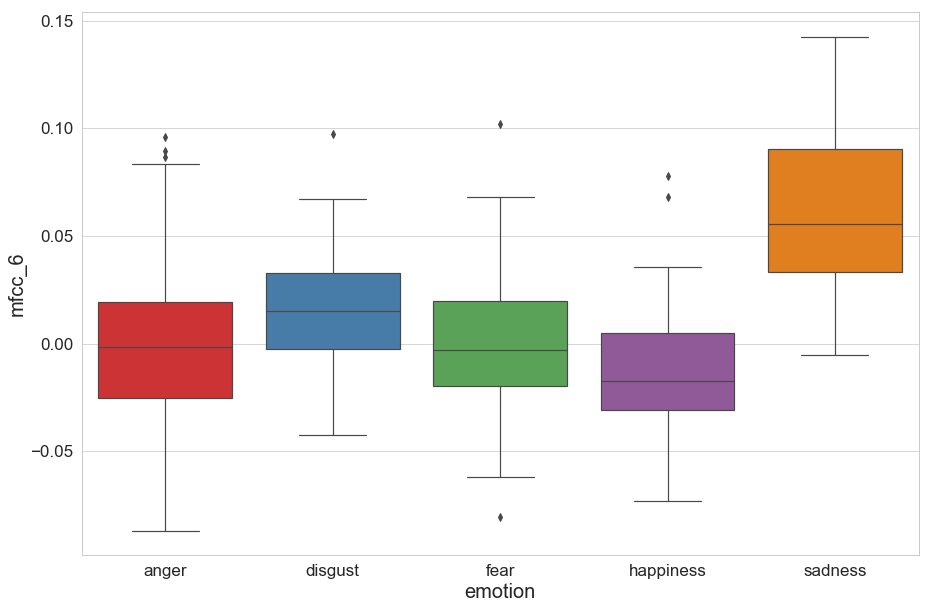

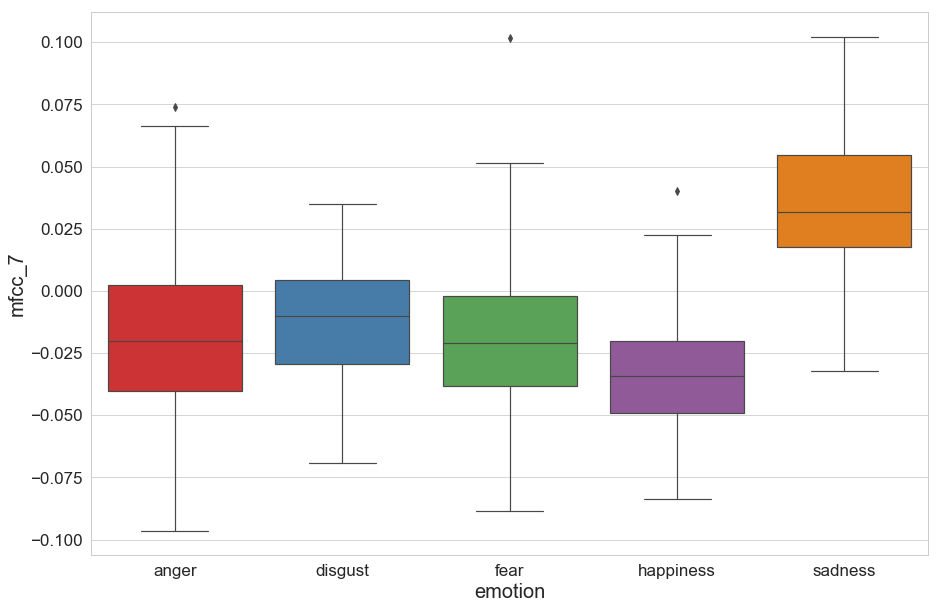

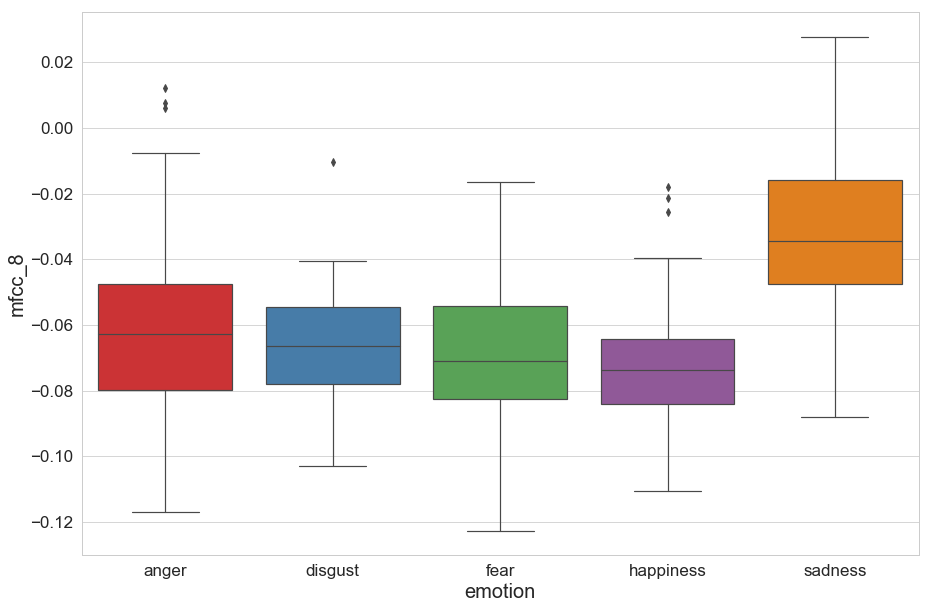

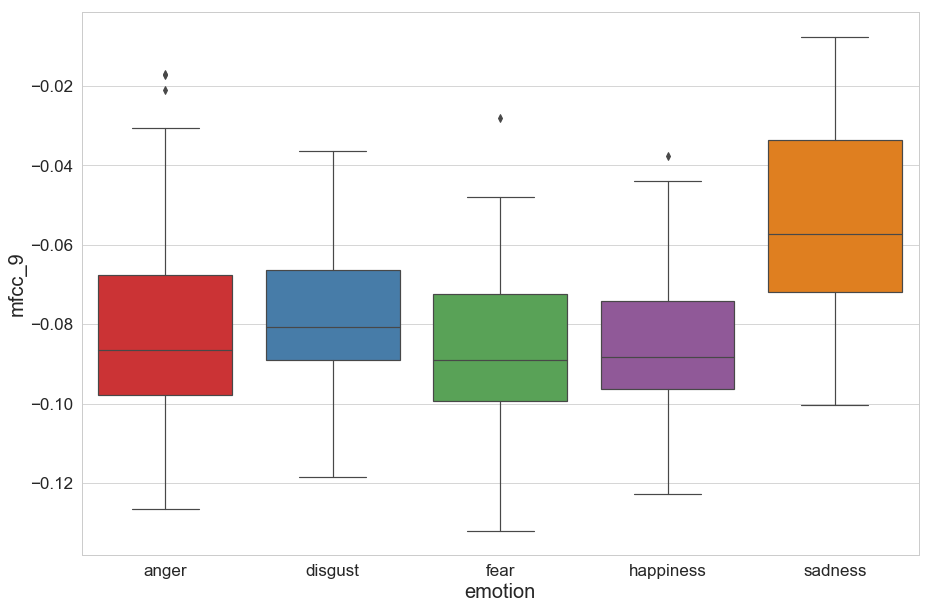

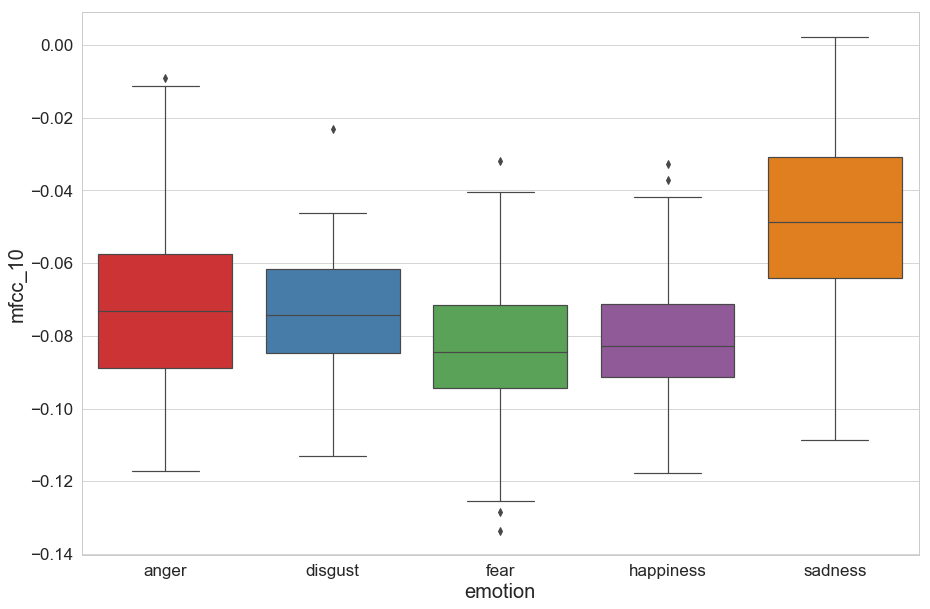

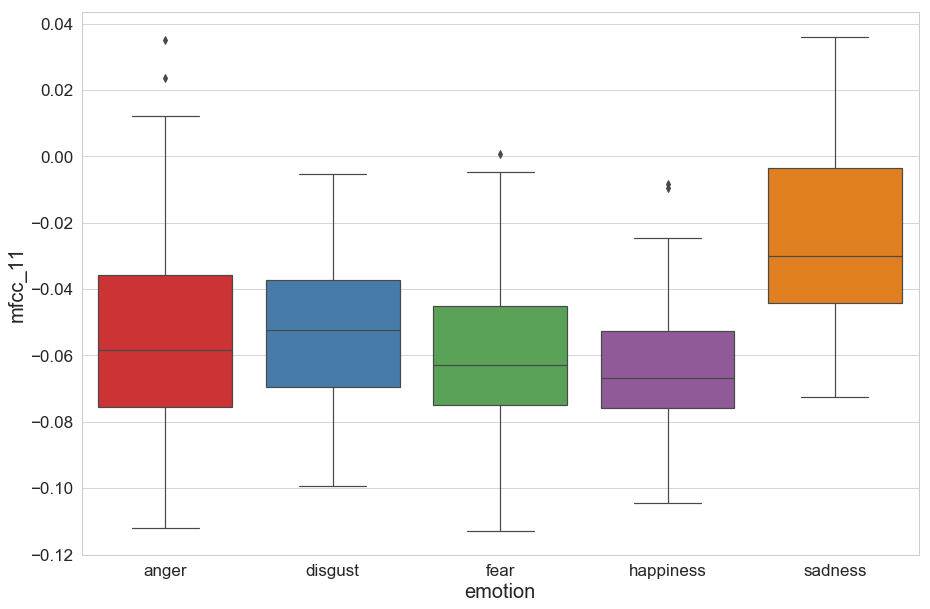

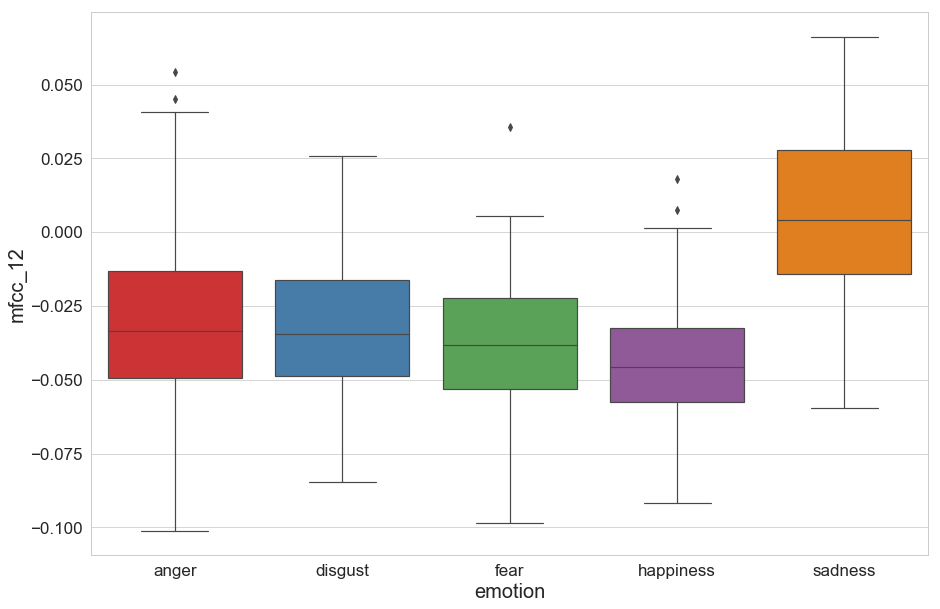

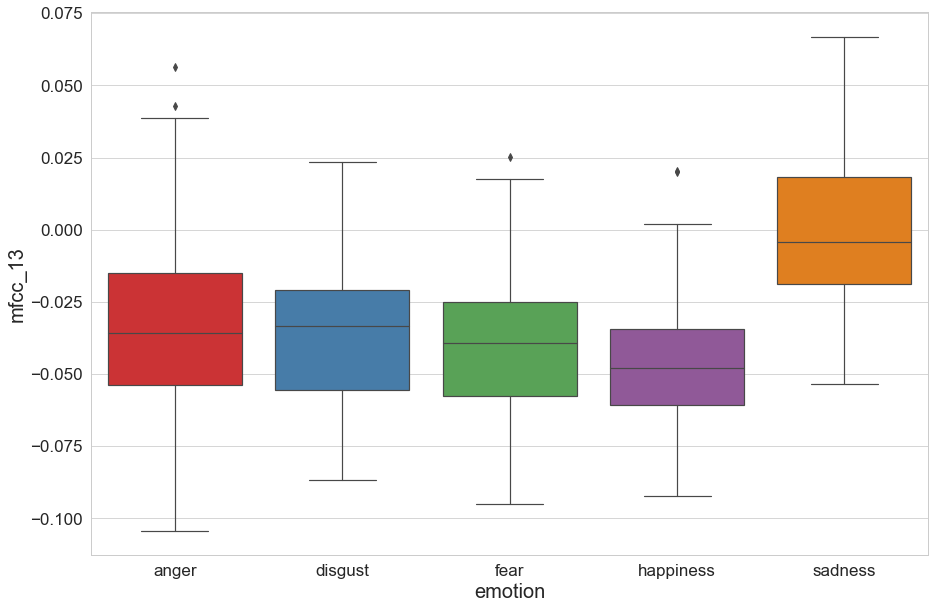

In [27]:
for mfcc in label_features[8:21]:
    display_boxplot(mfcc, df, df_emotions)

## Chroma Vector (chroma_< X >) - Chroma Deviation (chroma_std)

Una representación de 12 elementos de la energía espectral en la que los intervalos **representan las 12 clases de tonos de la música de tipo occidental** (espaciado de semitono).

La desviación estándar de los 12 coeficientes 

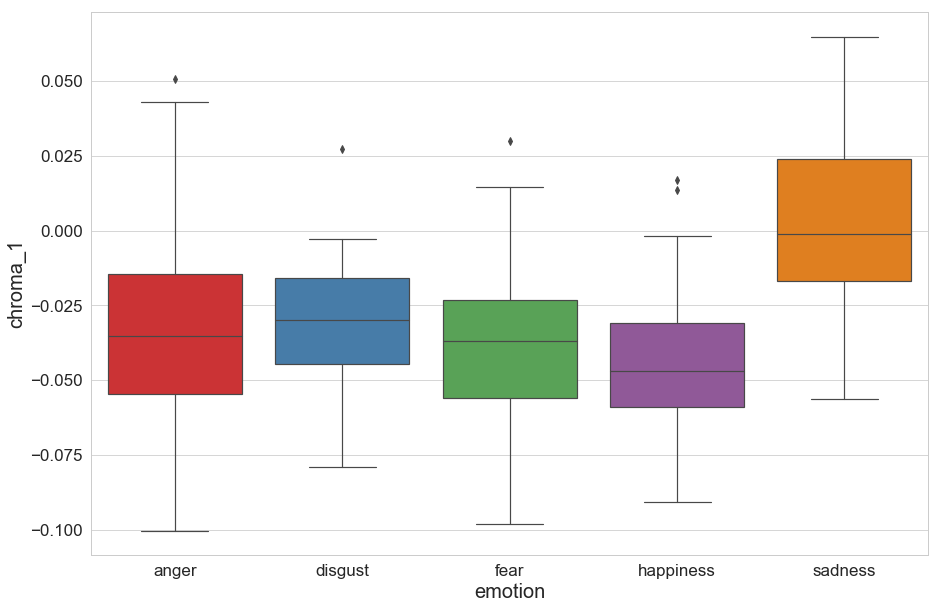

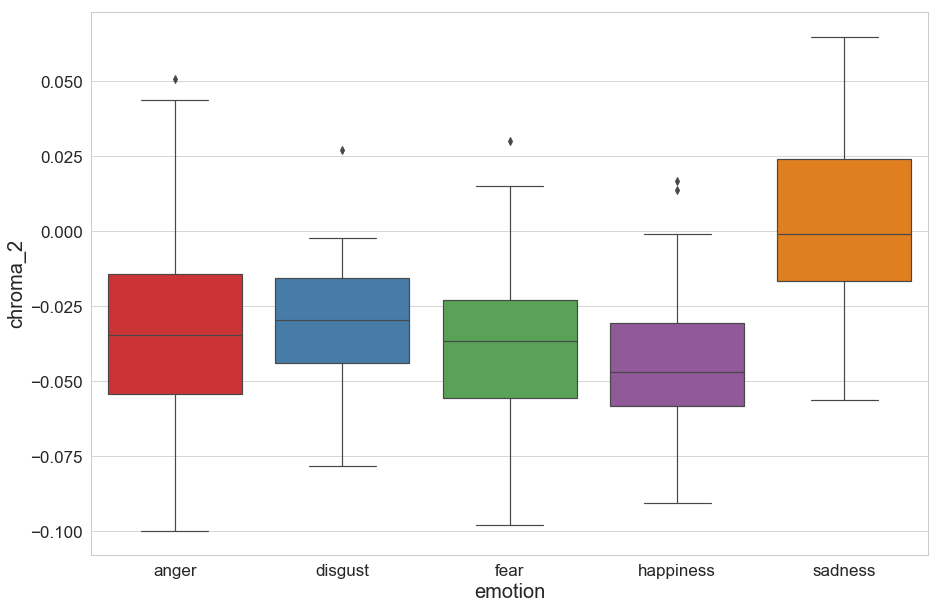

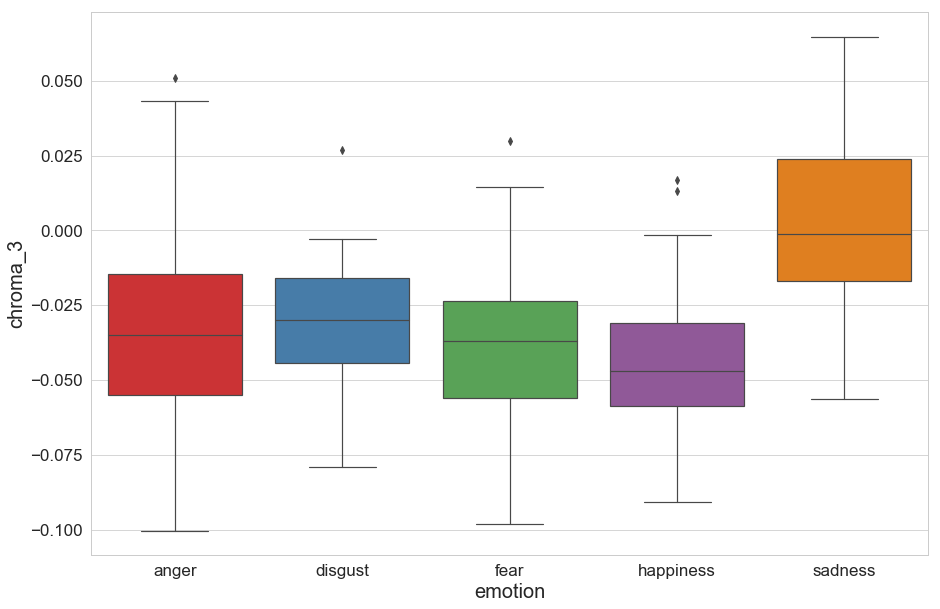

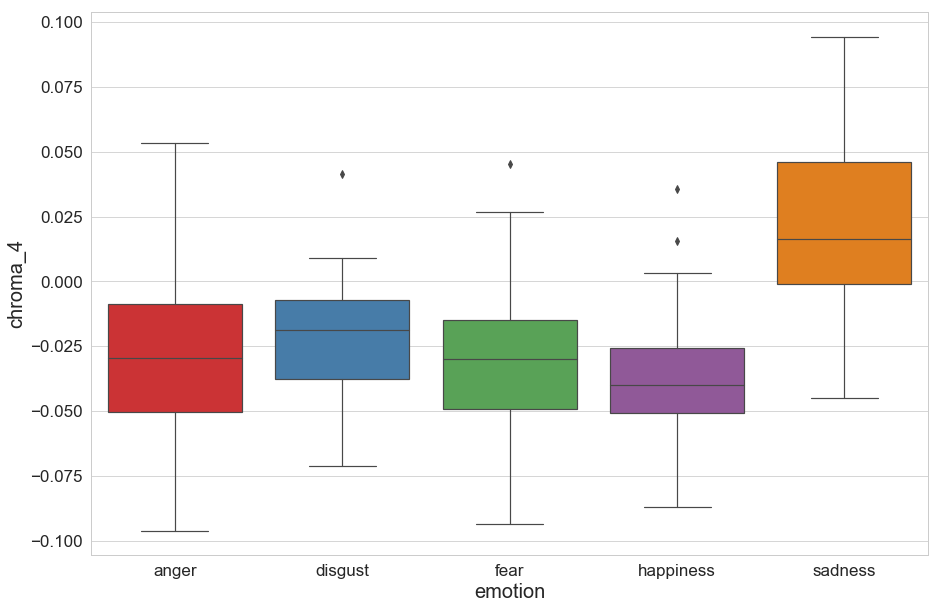

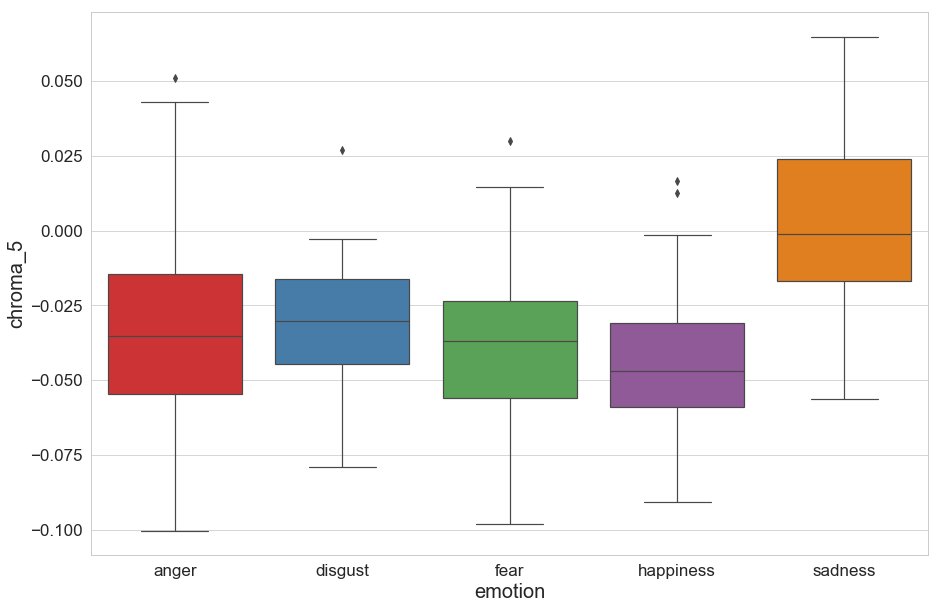

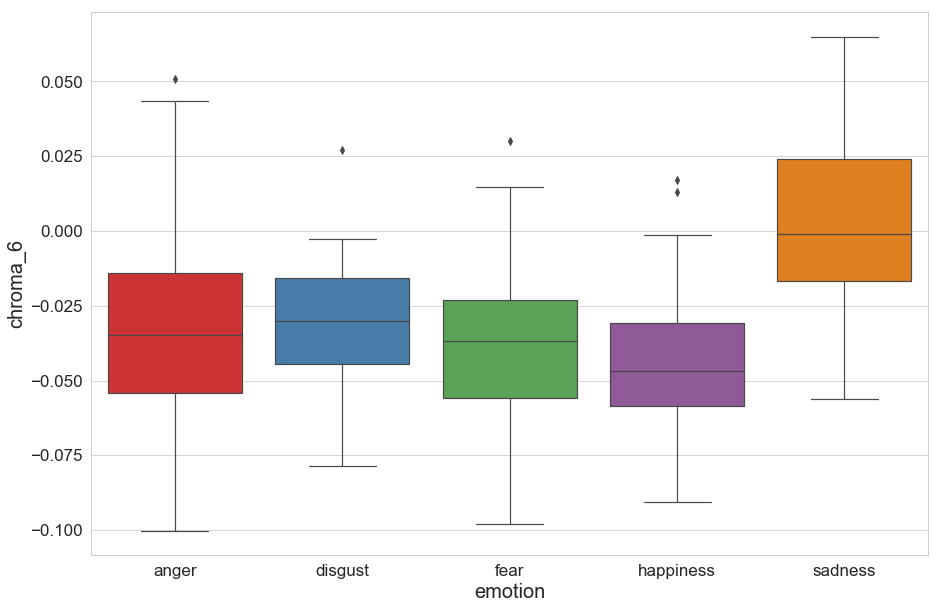

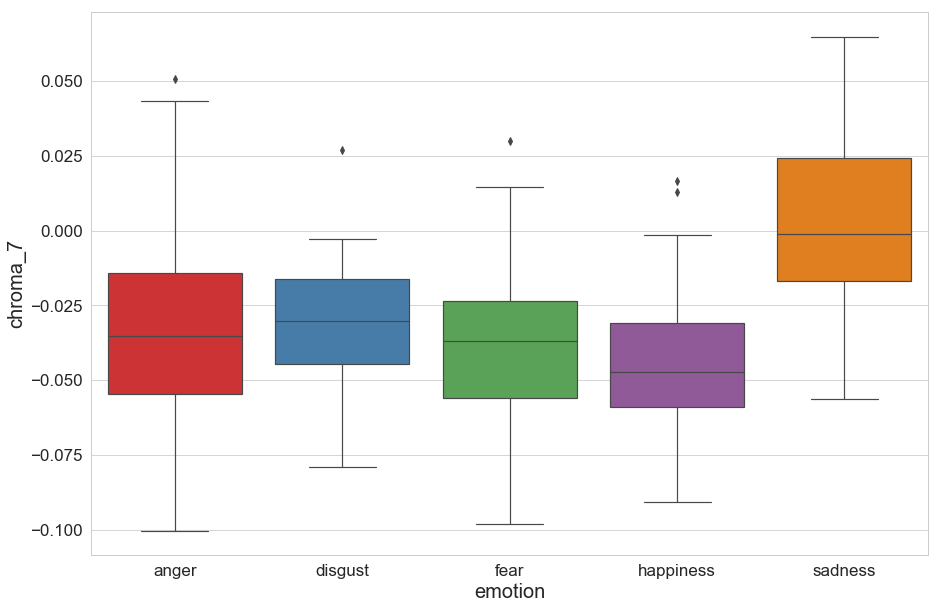

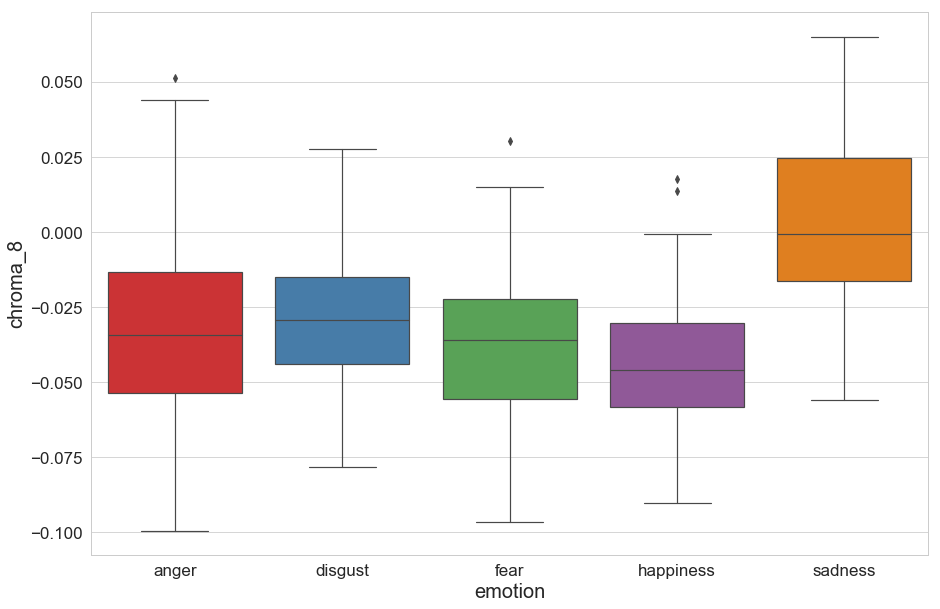

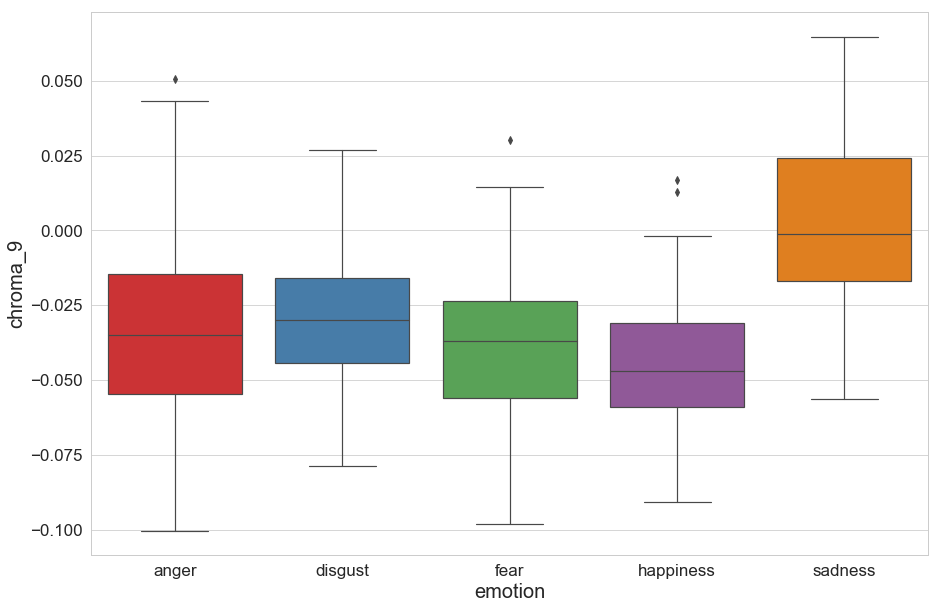

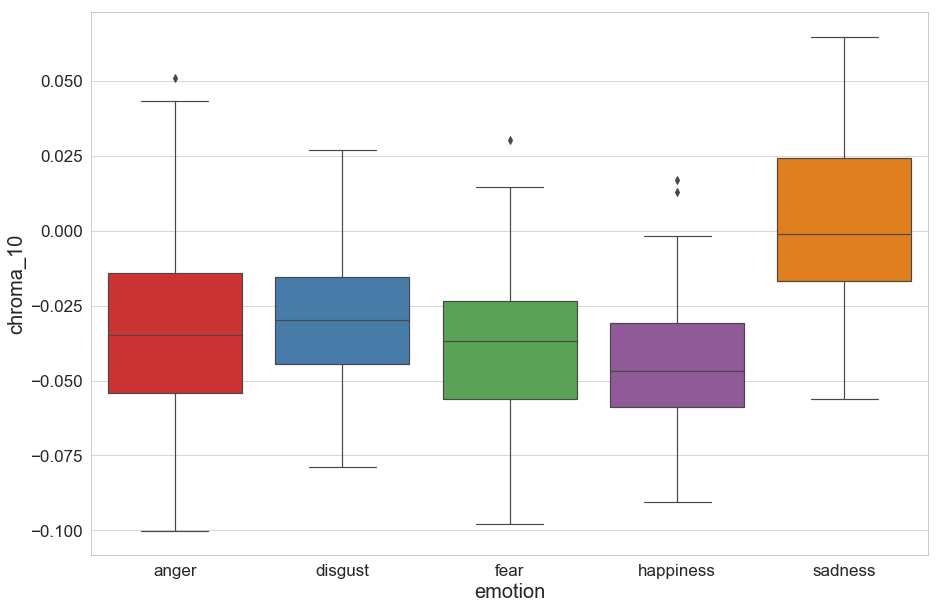

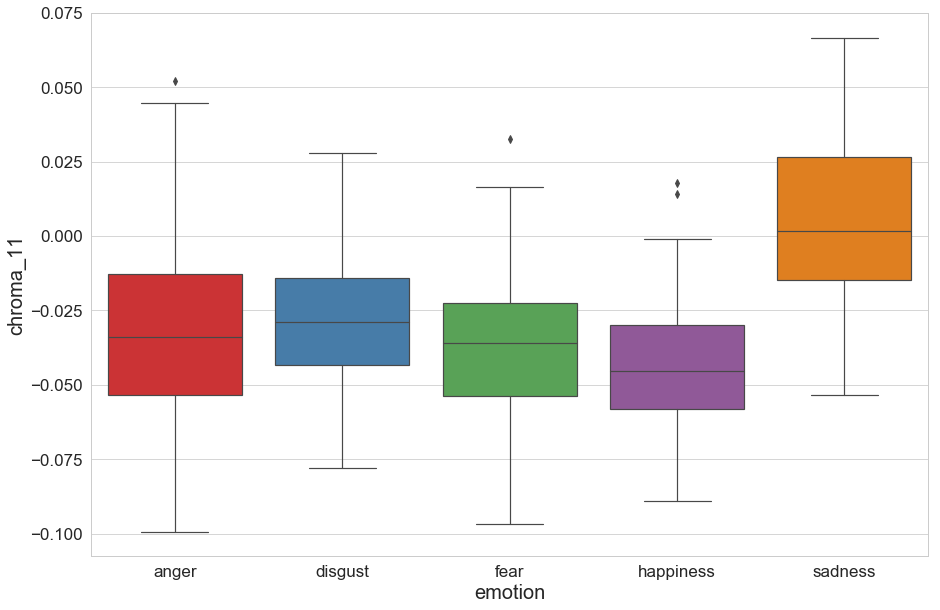

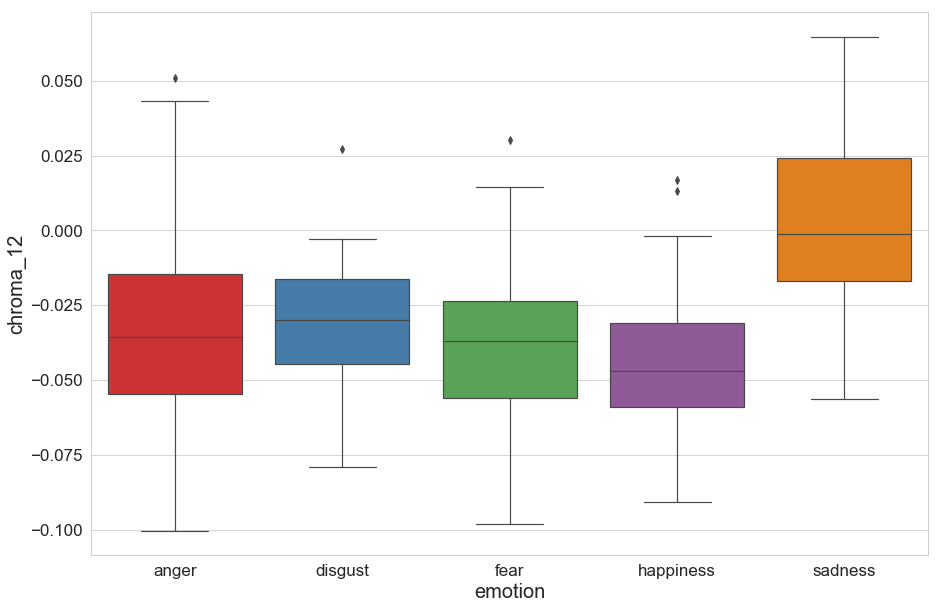

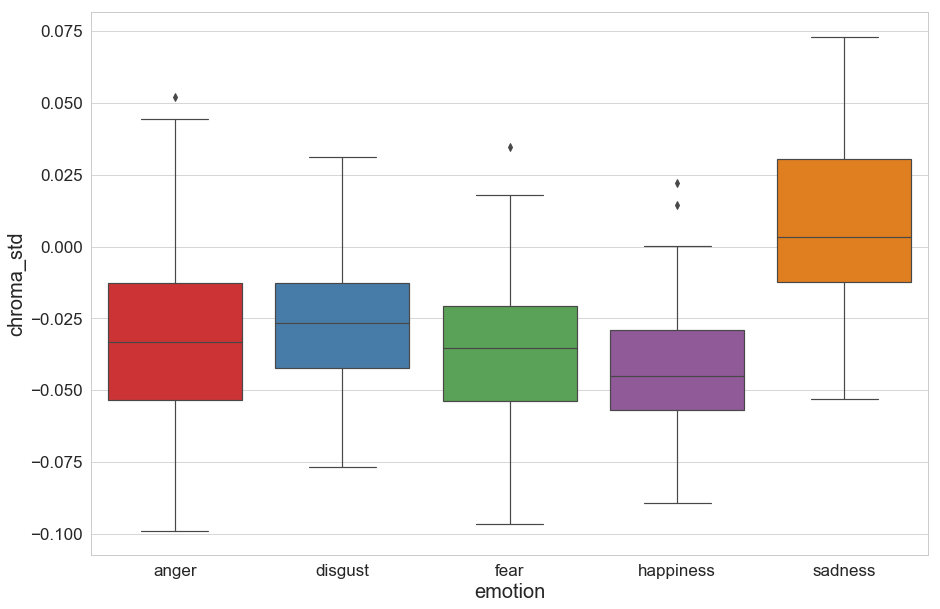

In [28]:
for chroma in label_features[21:34]:
    display_boxplot(chroma, df, df_emotions)